# Capstone Project

### Dataset: Indicators of Heart Disease (2022 UPDATE)
### Domain: Healthcare

#### Goal : Heart Disease Prediction and Finding key indicators of heart disease.

### Data Dictinary
- State: The geographical location or state of the respondent (categorical)
- Sex: Gender of the respondent (binary: Male, Female)
- GeneralHealth: Self-reported general health status (categorical: Excellent, Very Good, Good, Fair, Poor)
- PhysicalHealthDays: Number of days in the past month where physical health was not good (numeric)
- MentalHealthDays: Number of days in the past month where mental health was not good (numeric)

- LastCheckupTime: Time since the last health checkup (categorical: "Within past year (anytime less than 12 months ago)","Within past 2 years (1 year but less than 2 years ago)","Within past 5 years (2 years but less than 5 years ago)","5 or more years ago")

- PhysicalActivities: Level of engagement in physical activities (binary: Yes, No)
- SleepHours: Average hours of sleep per night (numeric)

- RemovedTeeth: Number of removed teeth (Categories: "None of them" (indicating no teeth removed), "1 to 5" (indicating 1 to 5 teeth removed), "6 or more, but not all" (indicating more than 5 teeth removed, but not all), "All" (indicating all teeth removed)

- HadHeartAttack: History of a heart attack (binary: Yes, No)
- HadAngina: History of angina (chest pain) (binary: Yes, No)
- HadStroke: History of a stroke (binary: Yes, No)
- HadAsthma: History of asthma (binary: Yes, No)
- HadSkinCancer: History of skin cancer (binary: Yes, No)
- HadCOPD: History of Chronic Obstructive Pulmonary Disease (binary: Yes, No)
- HadDepressiveDisorder: History of depressive disorder (binary: Yes, No)
- HadKidneyDisease: History of kidney disease (binary: Yes, No)
- HadArthritis: History of arthritis (binary: Yes, No)

- HadDiabetes: History of diabetes (Categories: Yes, No, No, pre-diabetes or borderline diabetes, Yes, but only during pregnancy (female))

- DeafOrHardOfHearing: Hearing impairment status (binary: Yes, No)
- BlindOrVisionDifficulty: Vision impairment status (binary: Yes, No)
- DifficultyConcentrating: Self-reported difficulty concentrating (binary: Yes, No)
- DifficultyWalking: Self-reported difficulty walking (binary: Yes, No)
- DifficultyDressingBathing: Self-reported difficulty in dressing/bathing (binary: Yes, No)
- DifficultyErrands: Self-reported difficulty in running errands (binary: Yes, No)

- SmokerStatus: Smoking status (categorical: Never smoked,Former smoker, Current smoker - now smokes every day, Current smoker - now smokes some days )
- ECigaretteUsage: E-cigarette usage status (Categorical: Never used e-cigarettes in my entire life, Not at all (right now), Use them some days, Use them every day)

- ChestScan: Whether the respondent had a chest scan (binary: Yes, No)
- RaceEthnicityCategory: Race or ethnicity category of the respondent (categorical: White only(Non-Hispanic),Hispanic,         Black only(Non-Hispanic), Other race only(Non-Hispanic) , Multiracial(Non-Hispanic))

- AgeCategory: Age category of the respondent (categorical: "Age 18 to 24","Age 25 to 29","Age 30 to 34","Age 35 to 39","Age 40 to 44","Age 45 to 49","Age 50 to 54","Age 55 to 59","Age 60 to 64","Age 65 to 69","Age 70 to 74","Age 75 to 79","Age 80 or older")

- HeightInMeters: Height of the respondent in meters (numeric)
- WeightInKilograms: Weight of the respondent in kilograms (numeric)
- BMI: Body Mass Index (numeric)

- AlcoholDrinkers: Alcohol drinking status (categorical: Yes, No)
- HIVTesting: History of HIV testing (binary: Yes, No)
- FluVaxLast12: Whether the respondent had a flu vaccine in the last 12 months (binary: Yes, No)
- PneumoVaxEver: Whether the respondent ever had a pneumonia vaccine (binary: Yes, No)

- TetanusLast10Tdap: Whether the respondent had a tetanus vaccine in the last 10 years (categories: 1. No, did not receive any tetanus shot in the past 10 years, 2. Yes, received tetanus shot but not sure what type, 3. Yes, received Tdap, 4. Yes, received tetanus shot, but not Tdap )
- HighRiskLastYear: Whether the respondent was considered high risk in the last year (binary: Yes, No)
- CovidPos: COVID-19 status (Categories: Yes, No, Tested positive using home test without a health professional)

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None

from scipy.stats import chi2_contingency
from scipy.stats import chisquare

import statsmodels.api as sm
import statsmodels
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report,cohen_kappa_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
import category_encoders as ce
from scipy.stats import uniform, randint

from warnings import filterwarnings
filterwarnings('ignore')

#### Reading Dataset csv File.

In [179]:
df = pd.read_csv('heart_2022_with_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


#### Checking number of rows and columns

In [3]:
print(df.shape)
print('Number of rows in Dataset are:', df.shape[0])
print('Number of columns in Dataset are:', df.shape[1])

(445132, 40)
Number of rows in Dataset are: 445132
Number of columns in Dataset are: 40


### Checking Datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

### Variable categorization (count of numeric and categorical)

In [5]:
df_categorical = df.select_dtypes(include=object)
categorical_var=list(df_categorical.columns)
print(' ')
print('Number of Categorical variables are:', len(categorical_var))
print(' ')
df_numeric = df.select_dtypes(exclude=object)
numeric_var=list(df_numeric.columns)
print('Number of Numeric variables are:', len(numeric_var))

 
Number of Categorical variables are: 34
 
Number of Numeric variables are: 6


### Pre Processing Data Analysis 

#### Null Value count and percentage

In [6]:
count = df.isnull().sum()
percentage = df.isnull().sum()/len(df)*100
Missing_values = pd.DataFrame({'Count': count, 'Percentage': percentage}, index = df.columns)
Missing_values 

,Count,Percentage
State,0,0.000000
Sex,0,0.000000
GeneralHealth,1198,0.269134
PhysicalHealthDays,10927,2.454777
MentalHealthDays,9067,2.036924
LastCheckupTime,8308,1.866413
PhysicalActivities,1093,0.245545
SleepHours,5453,1.225030
RemovedTeeth,11360,2.552052
HadHeartAttack,3065,0.688560


### Redundant columns

- State: As there are 54 countries we will check if there is any correlation with Heart attack otherwise we shall drop column.
- HeightInMeters, WeightInKilograms: BMI is more comprehensive measure. so these 2 columns can be deleted after null value treatment.

### Alternate sources of data that can supplement the core dataset 

#### Sources: 
- Previous health records
- Lab reports
- Medical history
- Nutritional DataBase 
- Food consumption Survey
- Detailed physical activity survey

#### Columns: 
- Essential - history of Hypertension, treatment for hypertension, any history of heart disease and durations for all, Cholesterol level

- other : Daily calorie consumption, Omega 3 supplements, type of exercises and duration etc.

### Project Justification

#### Project Statement:
- The project aims to analyze the risk factors associated with heart attacks by leveraging a comprehensive dataset. 
- It involves exploring the relationships between various health, lifestyle, and demographic factors to identify patterns and potential indicators of cardiovascular risk. 
- By employing advanced analytical techniques, the project seeks to contribute to the understanding of heart attack risk factors and support informed decision-making in healthcare.

#### Complexity Involved

- Handling Missing Values: Developing strategies to deal with missing health data for maintaining data accuracy.
- Dealing with Outliers: Identifying and addressing outliers to prevent skewed analysis and model distortion.
- Determining Relevant Columns: Selecting the most meaningful variables from numerous options for accurate risk assessment.
- Class Balancing: Ensuring balanced representation of outcomes to prevent model bias towards the majority class.
- Clustering for Pattern Identification: Employing unsupervised learning to unveil hidden structures and relationships in the dataset.
- Classification for Risk Prediction: Navigating model selection, hyperparameter tuning, and performance evaluation for effective risk prediction.

#### Project Outcome:

- Commercial Value: The project's insights benefit healthcare providers, insurers, and pharmaceutical companies by informing targeted preventive measures and personalized healthcare plans. This can lead to cost-effective solutions and improved patient outcomes.

- Academic Value: The project contributes to academia by advancing understanding in cardiovascular health, providing a basis for further research and new theories in heart attack risk assessment. The dataset and methodologies become valuable resources for future studies in public health and epidemiology.

- Social Value: Societally, the project's impact lies in improved public health outcomes, reduced healthcare burdens, and enhanced well-being. The insights inform public health policies, community programs, and educational initiatives promoting heart health awareness.

## EXPLORATORY DATA ANALYSIS

### Relationship between variables

### Numeric data analysis

In [7]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


#### Interpretations
- In PhysicalHealthDays and MentalHealthDays min is 0 and max is 30. so in a month days are mentioned.
- In PhysicalHealthDays and MentalHealthDays 50% observations are 0. Max among both are 30 indicating they are days of month.
- Sleep hours vary between 1 hour to 24 hours and 50% observations between 6 to 8 hours with mean 7.02. So there are extreme outliers in data. We need to verify if sleep hours has correlation with other health conditions as well.
- HeightInMeters,WeightInKilograms and BMI values also shows extreme outliers. We shall study the pattern of these to understand the impact on target variable.

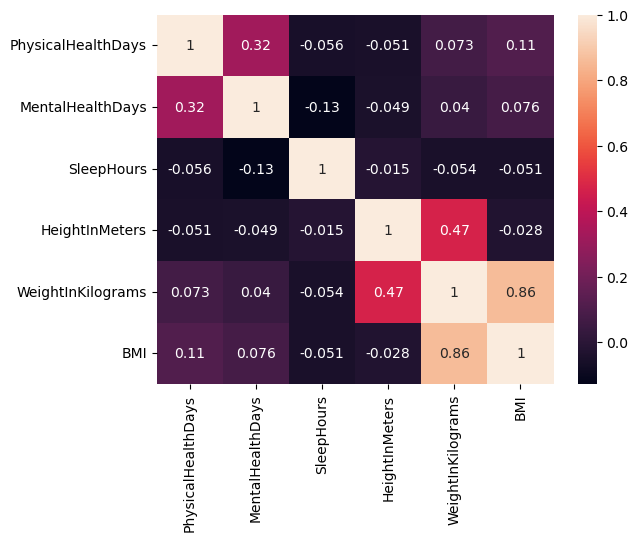

In [8]:
sns.heatmap(df.corr(),annot=True)
plt.show()

- We observe there is high correlation between weight and BMI. We keep the columns at this stage as null values in height or weight caused null in BMI. So after null value treatment we shall fill the null BMI column and then drop weight.

#### Numeric data analysis

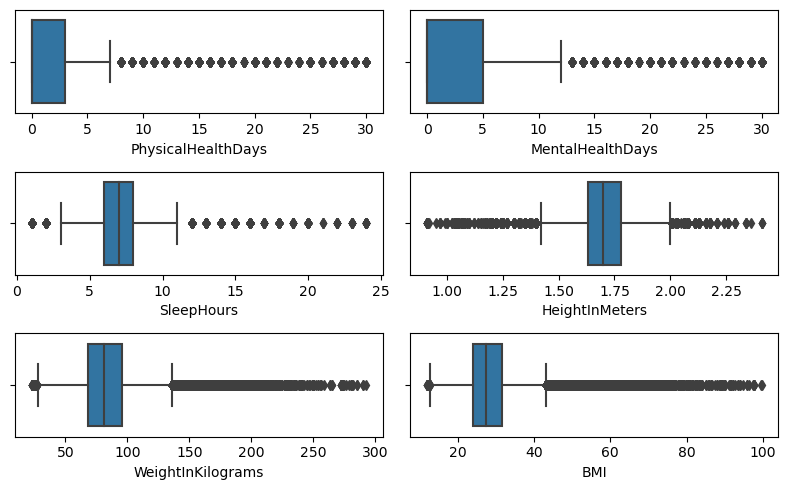

In [9]:
num_cols = df.select_dtypes(exclude=object)
fig, ax = plt.subplots(3, 2, figsize=(8,5))
for ax, col in zip(ax.flatten(), num_cols):
    sns.boxplot(x=col, data=df,  ax=ax)

fig.tight_layout()

- There are outliers among all the variables. Outliers in Physical Health Days and Mental Health days as few people had bad Physical and Mental Health for all 30 days. So it is obvious that 75% of people has rated it to very few days.
- Detailed Analysis of poor PhysicalHealth more than 20 days showed most of people are suffereing some or the other disease or having poor Mental Health Days.
- Detailed Analysis of poor MentalHealth more than 20 days showed that people 51.8% had depressive disorders. For both outliers last health check up is mostly within last 1 year. so can be cosidered for missing values in health check up.
- Those with more mental health days are  sleeping for less hours. So less sleep outiers may be related to mentalHealthdays or depressive disorder that needs to be verified.

# Physical Outliers Analysis

In [10]:
Physical_health_outliers= df[df.PhysicalHealthDays > 20]

# Mental_health_outliers Analysis

### Mental Health and Sleep hours

### Sleep Outliers analysis

- Few number of outliers at higher end (above 20) compared to lower end (below 5).
- MentalHealthDays for 30 frequency is 22.3%. Min value 0 also observed with frequency 39.3%. Which indicates there is need of separation of positive and negative outliers in sleep and reasses.
- Last Check up time within last 1 year is high. Compared to other physical comorbidities more number of people had depressive disorders around 39.7%.
- Among these  47.3% are having arthritis.34.5% have difficulty in walking.
- 50.1% of them have done Chest-scan suggesting some physical comorbidities. 14% values are missing in this section.
- Detailed analysis with sleep hour 1 (total 1154) shows some or the other physical or mental comorbidities.
- Detailed analysis of 24 hours of sleep (total 52) does not show significant relation with physical diseases. No distinct pattern identified.

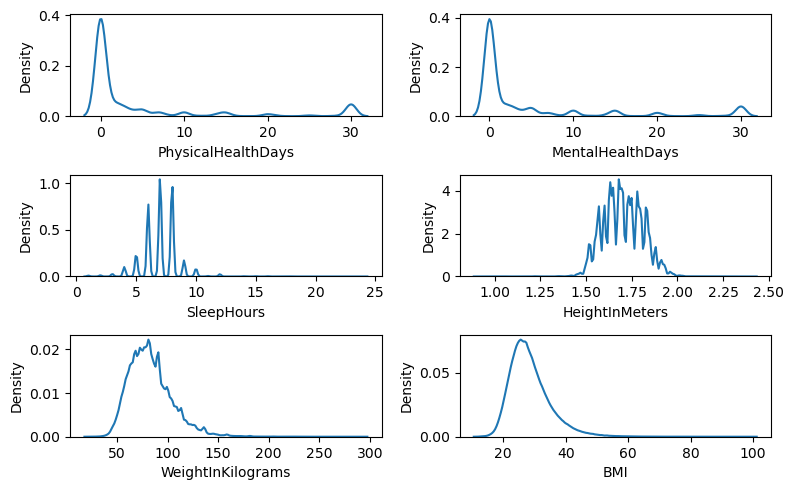

In [11]:
num_cols = df.select_dtypes(exclude=object)
fig, ax = plt.subplots(3, 2, figsize=(8,5))
for ax, col in zip(ax.flatten(), num_cols):
    sns.kdeplot(x=col, data=df,  ax=ax)

fig.tight_layout()

### Sleep Pattern analysis 24 hours

### Checking for duplicate records

In [12]:
df.duplicated().sum()

157

- We will not drop duplicates as there is no unique identity number to sample there is possibility that they are duplicate only by chance.

### Categorical variable analysis

In [13]:
df.describe(include=object).T

,count,unique,top,freq
State,445132,54,Washington,26152
Sex,445132,2,Female,235893
GeneralHealth,443934,5,Very good,148444
LastCheckupTime,436824,4,Within past year (anytime less than 12 months ...,350944
PhysicalActivities,444039,2,Yes,337559
RemovedTeeth,433772,4,None of them,233455
HadHeartAttack,442067,2,No,416959
HadAngina,440727,2,No,414176
HadStroke,443575,2,No,424336
HadAsthma,443359,2,No,376665


### Bivariate Analysis

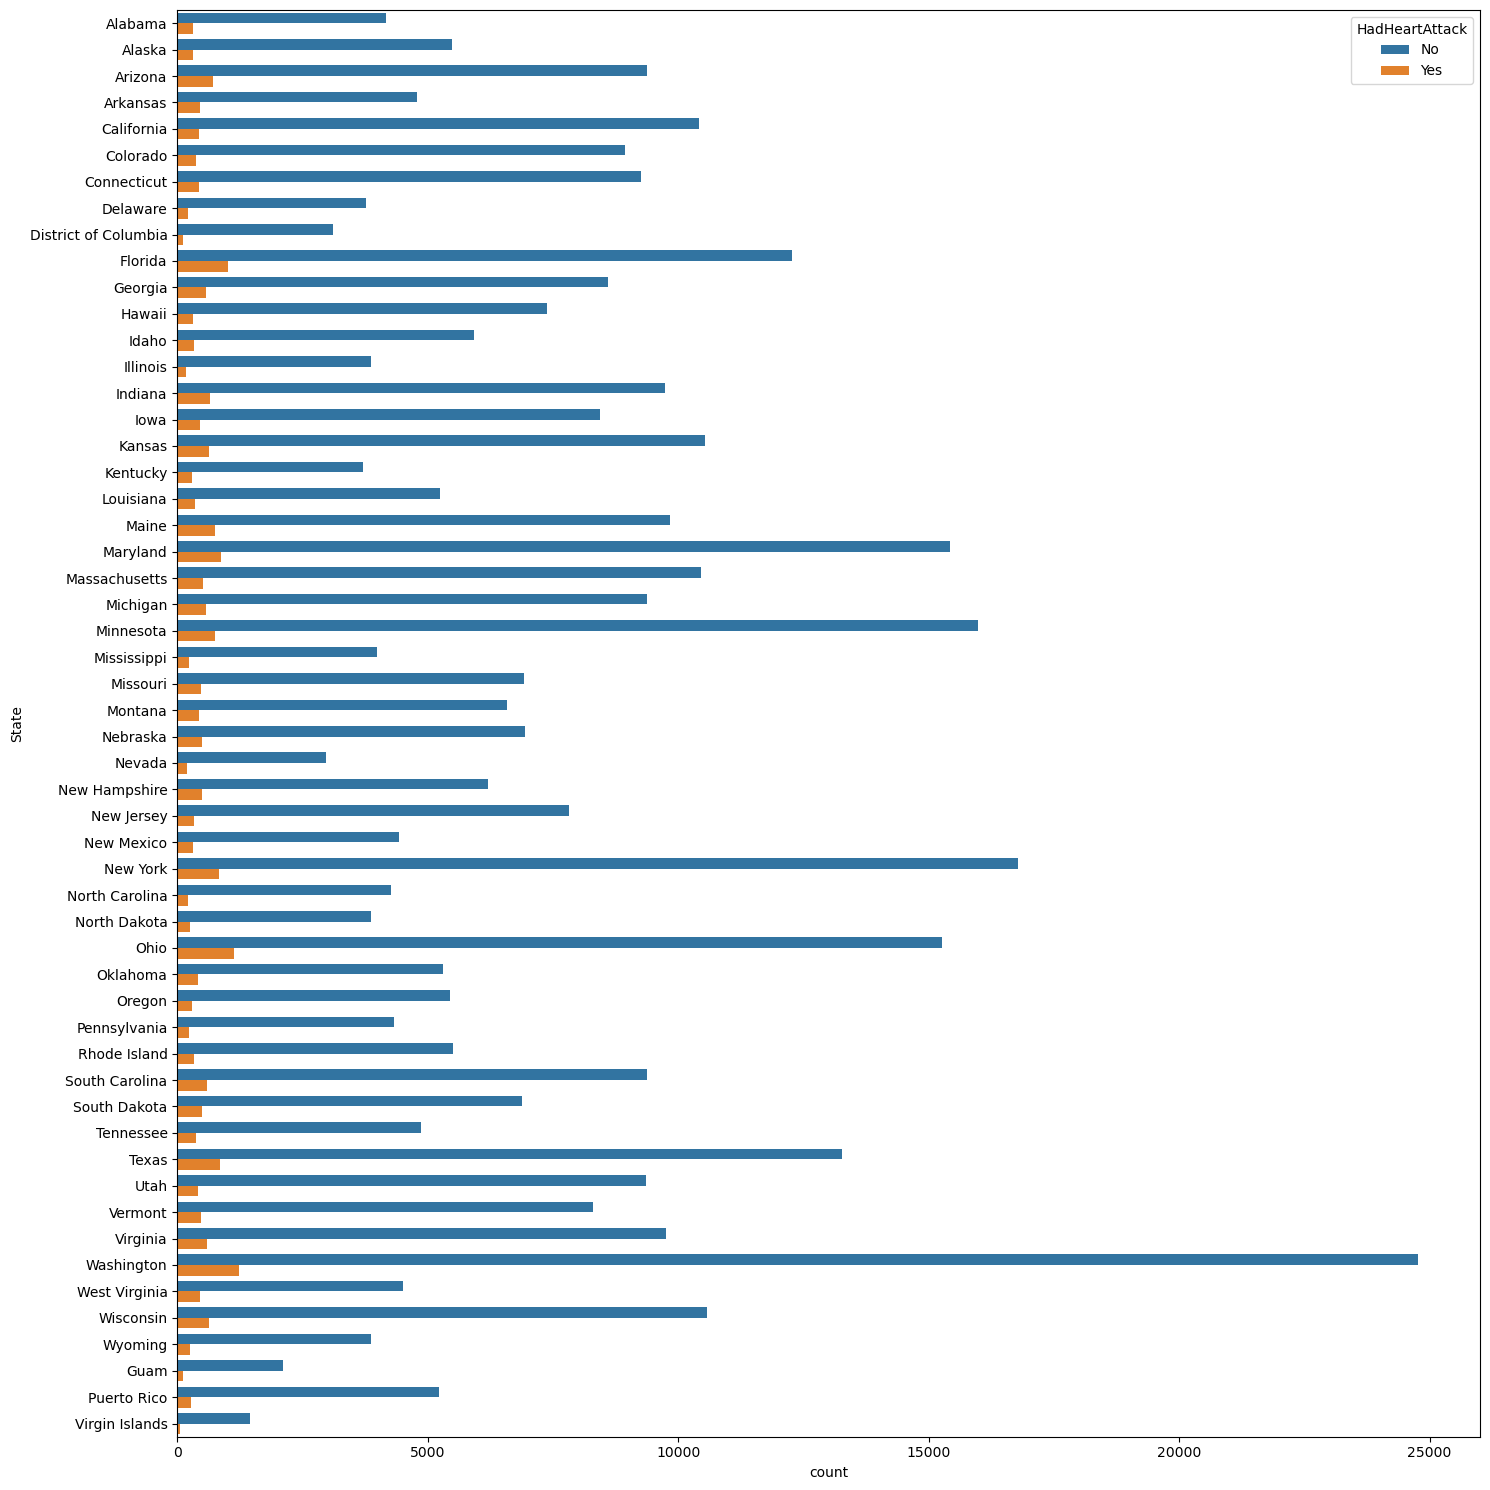

In [14]:
plt.figure(figsize=(15,15))
sns.countplot(y='State', hue='HadHeartAttack', data=df)
plt.tight_layout()

### Checking relation between State and target variable. 
- if no relation/pattern exist column can be dropped.

#### Ho : There is no association or independence between the 'State' and 'HadHeartAttack' 
#### Ha : There is association or dependence between the 'State' and 'HadHeartAttack'

In [180]:
table=pd.crosstab(df['State'],df['HadHeartAttack'])
observed=table.values
s,p,dof,e=chi2_contingency(observed)
print('P_value:',p,'\n')
print('''As p is low than alpha we  reject the null.
suggest that there is a statistically significant association between the State and the occurrence of heart attacks.''')

P_value: 6.797591127782331e-182 

As p is low than alpha we  reject the null.
suggest that there is a statistically significant association between the State and the occurrence of heart attacks.


- For simplification in statistical analysis and interpretation we will divide States based on region.

In [181]:
state_to_region = {
    'Alabama': 'South', 'Alaska': 'West', 'Arizona': 'West', 'Arkansas': 'South',
    'California': 'West', 'Colorado': 'West', 'Connecticut': 'Northeast', 'Delaware': 'Northeast',
    'District of Columbia': 'Northeast', 'Florida': 'South', 'Georgia': 'South', 'Hawaii': 'West',
    'Idaho': 'West', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest',
    'Kentucky': 'South', 'Louisiana': 'South', 'Maine': 'Northeast', 'Maryland': 'Northeast',
    'Massachusetts': 'Northeast', 'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Mississippi': 'South',
    'Missouri': 'Midwest', 'Montana': 'West', 'Nebraska': 'Midwest', 'Nevada': 'West',
    'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New Mexico': 'West', 'New York': 'Northeast',
    'North Carolina': 'South', 'North Dakota': 'Midwest', 'Ohio': 'Midwest', 'Oklahoma': 'South',
    'Oregon': 'West', 'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 'South Carolina': 'South',
    'South Dakota': 'Midwest', 'Tennessee': 'South', 'Texas': 'South', 'Utah': 'West', 'Vermont': 'Northeast',
    'Virginia': 'South', 'Washington': 'West', 'West Virginia': 'South', 'Wisconsin': 'Midwest',
    'Wyoming': 'West', 'Guam': 'U.S. Territories', 'Puerto Rico': 'U.S. Territories', 'Virgin Islands': 'U.S. Territories',
}

df['Region'] = df['State'].map(state_to_region)

#### Verifying if regions also heart attack has correlation.

In [182]:
table=pd.crosstab(df['Region'],df['HadHeartAttack'])
observed=table.values
s,p,dof,e=chi2_contingency(observed)
print('P_value:',p,'\n')
print('''As p is low than alpha we  reject the null. 
suggest that there is a statistically significant correlation between the Region and the occurrence of heart attacks.''')

P_value: 7.184684083443925e-62 

As p is low than alpha we  reject the null. 
suggest that there is a statistically significant correlation between the Region and the occurrence of heart attacks.


In [183]:
# dropping state column
df.drop('State',axis=1,inplace=True)

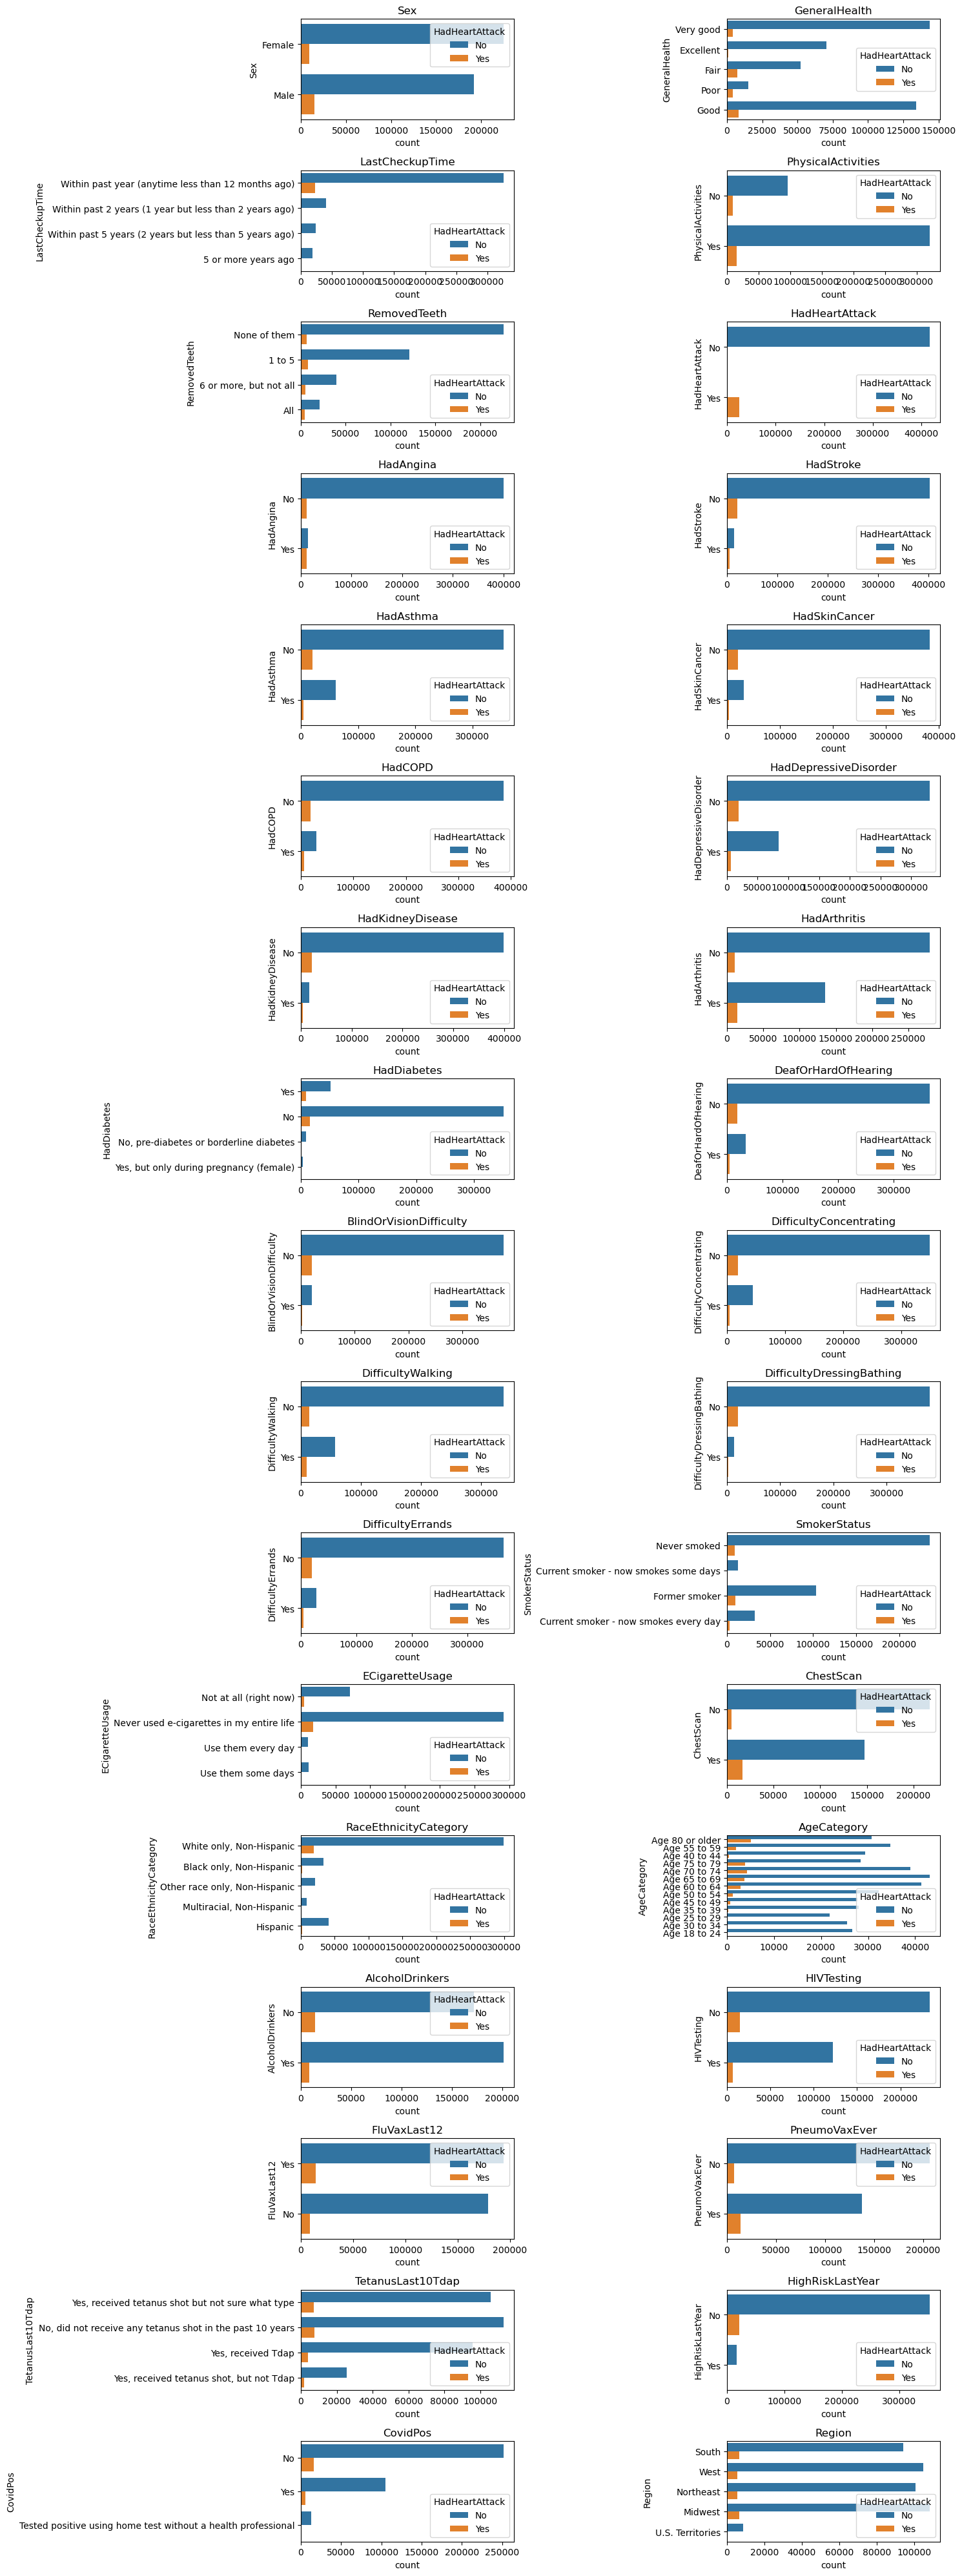

In [19]:
cat_cols = df.select_dtypes(include='object')
fig, ax = plt.subplots(17, 2, figsize=(15, 40))  
for axis, col in zip(ax.flatten(), cat_cols.columns):
    sns.countplot(y=col, hue='HadHeartAttack', data=df, ax=axis)
    axis.set_title(col)
    axis.legend(title='HadHeartAttack')

fig.tight_layout()
plt.show()

### Inferences
- In given data cases of heart attack are more in male compared to female.
- Cases of Heart Attack are observed regardless of general health condition. comparitively very few cases being in excellent health condition.
- Cases of Heart attack are observed among people who had last health check up within last 1 year.
- Compared to no activities more number of people doing physical activities. Proportion of heart attack is more among those not doing physical activities.
- Regardless of teeth removal Heart attack is observed among all categories. Proportion among all teeth removed is comparitively high.
- Class imbalance observed in had heart attack category.
- People suffering Angina mostly suffered heart attack.
- Proportion of had heart attack cases is more among people suffering with other diseases as compared to those not suffering that diseases.
- Prediabetic and diabetes in Pregnancy has no impact on heart attack. So they can be combined together. will assess further.
- Proportion of ecigarette usage in overall population is very less. By using it some days people slowly developing the habit but the overall heart attack cases not seen among users. This may be because of less usage and recent habits.
- Heart attack observed among both smokers and non smokers.
- Cases are more common among White Hispanic race followed by Black only hispanic.
- Age and Heart attack has positive correlation. As age category increases cases of heart attack increases.
- No specific pattern observed related to heart attack with variables- HIV testing, Alcoholdrinkers,Fluevaxlast12, Pneumovaxever, Tetanusvax.
- Those who had high risk for heart attack last year have not suffered attack.
- Cases are observed among both Covid positive and negative. very few people tested positive at home. so reduce data imbalance we can consider them among positive cases.
- Among given regions Cases are distributed in 4 regions - South,West,Northeast and Midwest. Record of cases in U.S. territories is not present. 

In [184]:
df.CovidPos.value_counts()

No                                                               270055
Yes                                                              110877
Tested positive using home test without a health professional     13436
Name: CovidPos, dtype: int64

- As very few cases tested positive at home they may create data imbalnace to avoid we consider them among positive cases.


In [185]:
df.CovidPos = df.CovidPos.replace({'Tested positive using home test without a health professional': 'Yes'})
df.CovidPos.value_counts()

No     270055
Yes    124313
Name: CovidPos, dtype: int64

## Bivariate Analysis

### Inferences
- From the pairplot we cannot find any pattern regarding Heart attack prediction.

## Statistical tests

In [22]:
for i in df_categorical.drop('HadHeartAttack', axis=1):
    table = pd.crosstab(df_categorical[i], df_categorical['HadHeartAttack'])
    chi_stat, p, _, _ = chi2_contingency(table)
    print('p_value for', i, ':', p)

p_value for State : 6.797591127782331e-182
p_value for Sex : 0.0
p_value for GeneralHealth : 0.0
p_value for LastCheckupTime : 0.0
p_value for PhysicalActivities : 0.0
p_value for RemovedTeeth : 0.0
p_value for HadAngina : 0.0
p_value for HadStroke : 0.0
p_value for HadAsthma : 1.4857113768222899e-78
p_value for HadSkinCancer : 5.630030311383114e-271
p_value for HadCOPD : 0.0
p_value for HadDepressiveDisorder : 2.6071113698125925e-87
p_value for HadKidneyDisease : 0.0
p_value for HadArthritis : 0.0
p_value for HadDiabetes : 0.0
p_value for DeafOrHardOfHearing : 0.0
p_value for BlindOrVisionDifficulty : 0.0
p_value for DifficultyConcentrating : 1.0898561929580878e-272
p_value for DifficultyWalking : 0.0
p_value for DifficultyDressingBathing : 0.0
p_value for DifficultyErrands : 0.0
p_value for SmokerStatus : 0.0
p_value for ECigaretteUsage : 6.906330069469711e-44
p_value for ChestScan : 0.0
p_value for RaceEthnicityCategory : 2.508540789021662e-100
p_value for AgeCategory : 0.0
p_value 

In [23]:
from scipy.stats import mannwhitneyu, ttest_ind

df_NA = df.copy()
df_NA = df_NA.dropna()

for i in df_numeric.columns:
    group_0 = df_NA[df_NA['HadHeartAttack'] == 'No'][i]
    group_1 = df_NA[df_NA['HadHeartAttack'] == 'Yes'][i]
    stat, p = ttest_ind(group_0, group_1)
    print('t_test p-value for', i, ':', p)

t_test p-value for PhysicalHealthDays : 0.0
t_test p-value for MentalHealthDays : 9.215807162576172e-38
t_test p-value for SleepHours : 0.07170974440857866
t_test p-value for HeightInMeters : 2.6802702173580795e-30
t_test p-value for WeightInKilograms : 4.378522592942596e-81
t_test p-value for BMI : 1.922381688458553e-51


In [24]:
from scipy.stats import mannwhitneyu

for i in df_numeric.columns:
    group_0 = df_NA[df_NA['HadHeartAttack'] == 'No'][i]
    group_1 = df_NA[df_NA['HadHeartAttack'] == 'Yes'][i]
    stat, p = mannwhitneyu(group_0, group_1)
    print('Mann-Whitney U test p-value for', i, ':', p)

Mann-Whitney U test p-value for PhysicalHealthDays : 0.0
Mann-Whitney U test p-value for MentalHealthDays : 0.14336640752530141
Mann-Whitney U test p-value for SleepHours : 0.4512714861956767
Mann-Whitney U test p-value for HeightInMeters : 2.564615471998178e-43
Mann-Whitney U test p-value for WeightInKilograms : 1.1755407641157844e-101
Mann-Whitney U test p-value for BMI : 1.969763464343368e-74


In [56]:
from scipy.stats import boxcox

# Transform 'PhysicalHealthDays' column using log transformation
df_NA['PhysicalHealthDays'] = np.log1p(df_NA['PhysicalHealthDays'])

# Compute Box-Cox transformation of 'BMI' column and assign to the column
transformed_bmi, _ = boxcox(df_NA['BMI'])
df_NA['BMI'] = transformed_bmi

In [58]:
df_NA.drop(['SleepHours','MentalHealthDays'],axis=1,inplace=True)

### Base Model without null values

In [59]:
print('Shape with null values:',df.shape)
print('Shape without null values:',df_NA.shape)

Shape with null values: (445132, 40)
Shape without null values: (246022, 38)


In [60]:
df_NA.reset_index(drop=True,inplace =True)

## Data Encoding

In [61]:
df_NA['HadHeartAttack'].replace({'Yes':1,'No':0},inplace=True)

In [63]:
df_NA_cat = df_NA.select_dtypes(include=object)
df_NA_num = df_NA.select_dtypes(exclude=object)

### Checking for class Balance

In [66]:
a = df_NA['HadHeartAttack'].value_counts()
print(a)

0    232587
1     13435
Name: HadHeartAttack, dtype: int64


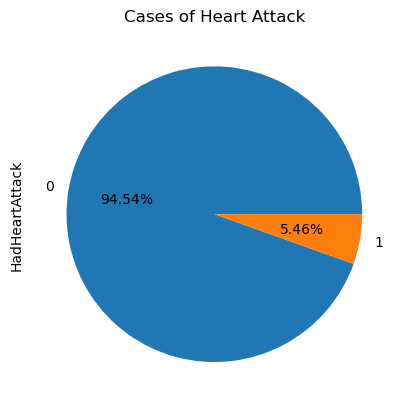

In [67]:
a.plot(kind='pie', autopct='%0.2f%%')
plt.title('Cases of Heart Attack')
plt.show()

## User defined functions

In [68]:
def data_preprocess(X, y):
    ss = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=10)
    train_scaled = ss.fit_transform(X_train)
    test_scaled = ss.transform(X_test)
    train_scaled = pd.DataFrame(train_scaled, columns=X.columns).reset_index(drop=True)
    test_scaled = pd.DataFrame(test_scaled, columns=X.columns).reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    return train_scaled, test_scaled, y_train, y_test

In [319]:
def performance(X,y,model):
    y_pred = model.predict(X)
    ypred_prob = model.predict_proba(X)[:,1]
    cm = confusion_matrix(y,y_pred)
    sns.heatmap(cm,annot=True)
    print(classification_report(y,y_pred))
    print('AUC Score:', roc_auc_score(y,ypred_prob))

In [70]:
def roc_plot(model,X,y,label):
    ypred_prob = model.predict_proba(X)[:,1]
    auc_score = roc_auc_score(y,ypred_prob)
    fpr,tpr,thresh = roc_curve(y,ypred_prob)
    
    plt.plot(fpr,tpr,label = label+'(AUC Score: %0.4f)'%auc_score)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    
    plt.plot([0,1],[0,1],'r--')
    
    plt.title('ROC Plot')
    plt.xlabel('FPR (1-Specificity)')
    plt.ylabel('TPR (Sensitivity)')
    
    plt.legend(loc='lower right')
    plt.grid(True)

## Checking Multicollinearity

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = df_NA.select_dtypes(exclude=object)
vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

vif = vif.sort_values(by='VIF',ascending=False)
vif.head()

,Variable,VIF
2,HeightInMeters,248.312813
4,BMI,236.571736
3,WeightInKilograms,19.982995
0,PhysicalHealthDays,1.579260
1,HadHeartAttack,1.073032


In [73]:
df_NA.drop('HeightInMeters',axis=1,inplace=True)

In [74]:
df_vif = df_NA.select_dtypes(exclude=object)
vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

vif = vif.sort_values(by='VIF',ascending=False)
vif.head()

,Variable,VIF
3,BMI,18.964602
2,WeightInKilograms,18.835419
0,PhysicalHealthDays,1.563687
1,HadHeartAttack,1.072738


In [75]:
df_NA.drop('WeightInKilograms',axis=1,inplace=True)

In [76]:
df_vif = df_NA.select_dtypes(exclude=object)
vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

vif = vif.sort_values(by='VIF',ascending=False)
vif.head()

,Variable,VIF
2,BMI,1.563062
0,PhysicalHealthDays,1.558034
1,HadHeartAttack,1.071934


- Columns height and weight dropped due to high VIF

### Model 1 without imbalance treated

In [77]:
X = df_NA.drop('HadHeartAttack', axis=1)
y = df_NA['HadHeartAttack']
categorical_columns = X.select_dtypes(include=object).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

encoder = ce.WOEEncoder(cols=categorical_columns)

X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

In [82]:
X_train_encoded.head()

,Sex,GeneralHealth,PhysicalHealthDays,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,Region
234472,-0.366251,-1.387555,0.000000,0.144066,-0.205691,0.079316,2.658029,-0.168367,-0.042153,0.525285,-0.178983,-0.049610,-0.108755,-0.461103,-0.304808,-0.134957,-0.076182,-0.074842,-0.331898,-0.069002,-0.108108,0.429824,0.018836,-0.955008,0.055023,0.778221,1.430159,-0.346212,0.041294,0.177665,0.508523,0.137231,0.019768,-0.172396,0.016566
202771,-0.366251,-1.387555,0.000000,0.144066,-0.205691,0.079316,-0.665708,-0.168367,-0.042153,-0.063803,-0.178983,-0.049610,-0.108755,-0.461103,-0.304808,-0.134957,-0.076182,-0.074842,-0.331898,-0.069002,-0.108108,-0.405268,0.018836,-0.955008,0.055023,-1.432673,1.407222,0.316276,-0.083243,-0.243872,-0.556262,0.137231,0.019768,-0.172396,-0.086730
234464,0.295526,0.095794,0.000000,0.144066,-0.205691,-0.681628,-0.665708,-0.168367,-0.042153,-0.063803,-0.178983,-0.049610,-0.108755,-0.461103,-0.304808,-0.134957,-0.076182,-0.074842,-0.331898,1.140019,0.943990,-0.405268,0.018836,-0.955008,-0.332772,-0.468427,1.482057,-0.346212,0.041294,0.177665,0.508523,-0.310131,0.019768,0.072913,0.016566
22934,0.295526,-0.663602,0.959135,-1.040883,-0.205691,-0.681628,-0.665708,-0.168367,0.215038,-0.063803,-0.178983,0.173121,-0.108755,-0.461103,-0.304808,-0.134957,-0.076182,-0.074842,-0.331898,-0.069002,-0.108108,-0.405268,0.018836,0.650079,0.055023,-1.432673,1.427667,-0.346212,-0.083243,0.177665,-0.556262,0.137231,0.019768,0.072913,-0.086730
242190,-0.366251,0.875108,1.489299,0.144066,0.520605,0.810253,2.658029,-0.168367,-0.042153,-0.063803,-0.178983,-0.049610,-0.108755,-0.461103,1.008579,-0.134957,0.927764,-0.074842,1.045289,-0.069002,0.943990,-0.405268,0.018836,-0.955008,-0.332772,0.350489,1.482536,0.316276,0.041294,0.177665,0.508523,0.069072,0.019768,0.072913,-0.117877


In [86]:
print(X_train_encoded.shape,X_test_encoded.shape,y_train.shape,y_test.shape)

(172215, 35) (73807, 35) (172215,) (73807,)


In [87]:
lr_model = LogisticRegression(random_state=100)
lr_model.fit(X_train_encoded,y_train)

LogisticRegression(random_state=100)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    162811
           1       0.56      0.25      0.34      9404

    accuracy                           0.95    172215
   macro avg       0.76      0.62      0.66    172215
weighted avg       0.94      0.95      0.94    172215

AUC Score: 0.8876453361211827


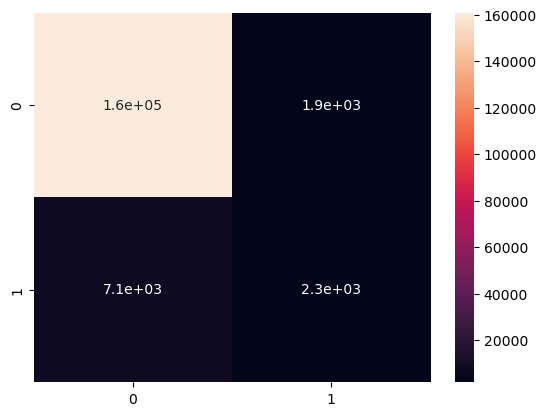

In [88]:
performance(X_train_encoded,y_train,lr_model)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     69776
           1       0.56      0.25      0.35      4031

    accuracy                           0.95     73807
   macro avg       0.76      0.62      0.66     73807
weighted avg       0.94      0.95      0.94     73807

AUC Score: 0.8898635466216848


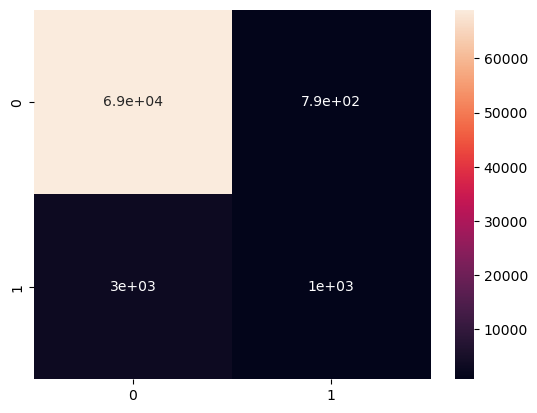

In [89]:
performance(X_test_encoded,y_test,lr_model)

### Model 2 : Logit model after class balance correction

## Resampling Data

In [90]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=100,sampling_strategy=0.4,k_neighbors=10)
X_train_final ,y_train_final = smt.fit_resample(X_train_encoded,y_train)
print(X_train_final.shape,y_train_final.shape)

(227935, 35) (227935,)


In [92]:
y_train_final.value_counts(normalize=True)

0    0.714287
1    0.285713
Name: HadHeartAttack, dtype: float64

In [93]:
lr_model2 = LogisticRegression(random_state=100)
lr_model2.fit(X_train_final,y_train_final)

LogisticRegression(random_state=100)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89    162811
           1       0.79      0.59      0.68     65124

    accuracy                           0.84    227935
   macro avg       0.82      0.77      0.79    227935
weighted avg       0.84      0.84      0.83    227935

AUC Score: 0.890431126720375


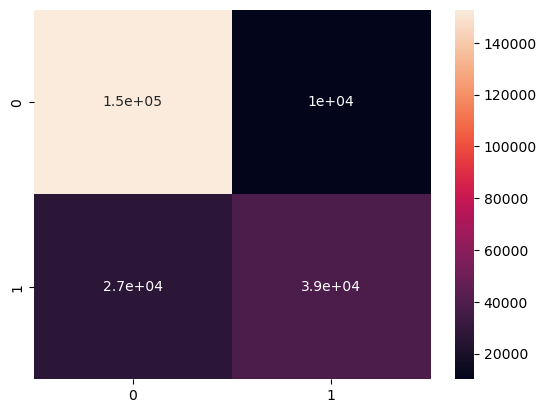

In [94]:
performance(X_train_final,y_train_final,lr_model2)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     69776
           1       0.36      0.59      0.45      4031

    accuracy                           0.92     73807
   macro avg       0.67      0.77      0.70     73807
weighted avg       0.94      0.92      0.93     73807

AUC Score: 0.8871671839164839


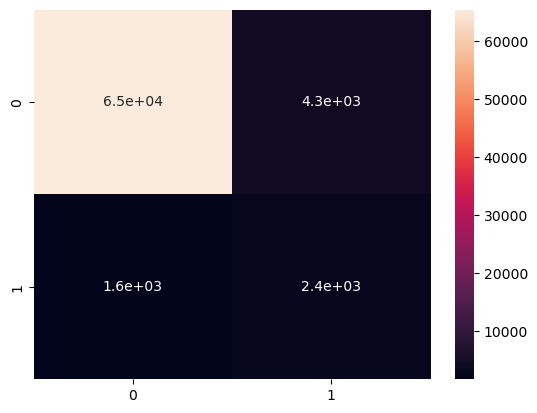

In [95]:
performance(X_test_encoded,y_test,lr_model2)

- We can see that overall accuracy for train and test is cosistent 0.84 for train and 0.92 for test.
- Recall for both is consistent 0.52 for train and 0.52 for test.
- Model will be helpful to identify risk for heart attack given the underlying information.
- Precision is less. Still giving False positive will not harm patient rather will help them to take healthy steps to prevent further possibilities being this a general health survey. and seconday measures can be initiated
- We will try other algorithms as our data has more categorical columns and outliers in numeric.

### Decision Tree

In [99]:
param_dist = {
    'max_depth': randint(3, 10),  
    'min_samples_split': randint(2, 20),  
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2'],  
    'criterion': ['gini', 'entropy']}

# Initialize RandomizedSearchCV
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   scoring='recall',
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)


dt_model1 = dt_random_search.fit(X_train_final,y_train_final)
dt_model1.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'min_samples_split': 3}

In [100]:
dt_model_without_null = DecisionTreeClassifier(criterion= 'gini',max_depth= 9,max_features='log2', min_samples_leaf= 10,
                                               min_samples_split=3,random_state=100)
dt_model_without_null.fit(X_train_final,y_train_final)

DecisionTreeClassifier(max_depth=9, max_features='log2', min_samples_leaf=10,
                       min_samples_split=3, random_state=100)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91    162811
           1       0.81      0.67      0.73     65124

    accuracy                           0.86    227935
   macro avg       0.84      0.80      0.82    227935
weighted avg       0.86      0.86      0.86    227935

AUC Score: 0.9148377706587996


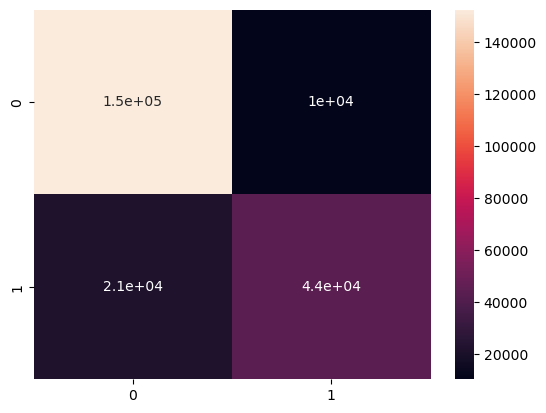

In [101]:
performance(X_train_final,y_train_final,dt_model_without_null)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     69776
           1       0.24      0.36      0.29      4031

    accuracy                           0.90     73807
   macro avg       0.60      0.65      0.62     73807
weighted avg       0.92      0.90      0.91     73807

AUC Score: 0.8049073457788813


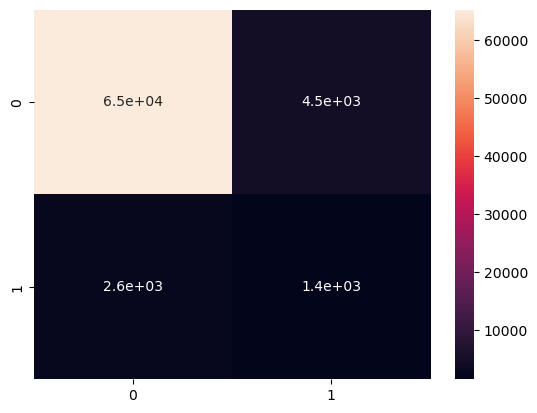

In [102]:
performance(X_test_encoded,y_test,dt_model_without_null)

In [ ]:
param_dist = {'n_estimators':[50,100,150],
    'max_depth': [3,6,9]  
    'min_samples_split': [4,6,8],  
    'min_samples_leaf': [4,6,8],
    'max_features': ['sqrt', 'log2'],  
    'criterion': ['gini', 'entropy']}

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=10),
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   scoring='recall',
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=100)


Rf_model1 = rf_random_search.fit(X_train_final,y_train_final)
Rf_model1.best_params_

In [105]:
param_grid = {'max_depth': [3, 5, 7],
    'min_child_weight': [3, 5, 6],
    'gamma': [0.01, 0.1, 0.11],
    'scale_pos_weight': [4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0], 
    'colsample_bytree': [0.6, 0.8, 1.0]}

xgb = XGBClassifier()

xgb1= RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,scoring='recall', cv=3, n_jobs=-1)
xgb1_null_dropped = xgb1.fit(X_train_final,y_train_final)
xgb1_null_dropped.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 5,
 'min_child_weight': 6,
 'max_depth': 3,
 'learning_rate': 0.01,
 'gamma': 0.11,
 'colsample_bytree': 0.6}

In [106]:
XGB1_null_dropped = XGBClassifier(subsample = 0.8, scale_pos_weight = 5,
 min_child_weight = 6,max_depth =3,learning_rate= 0.01,gamma = 0.11,colsample_bytree= 0.6)
XGB1_null_dropped.fit(X_train_final,y_train_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.11, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.98      0.53      0.69    162811
           1       0.45      0.97      0.62     65124

    accuracy                           0.66    227935
   macro avg       0.72      0.75      0.65    227935
weighted avg       0.83      0.66      0.67    227935

AUC Score: 0.9244973668610836


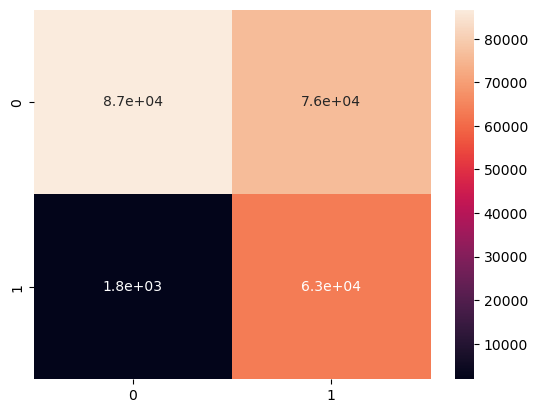

In [107]:
performance(X_train_final,y_train_final,XGB1_null_dropped)

              precision    recall  f1-score   support

           0       0.99      0.53      0.69     69776
           1       0.10      0.95      0.19      4031

    accuracy                           0.55     73807
   macro avg       0.55      0.74      0.44     73807
weighted avg       0.95      0.55      0.66     73807

AUC Score: 0.8775564618559524


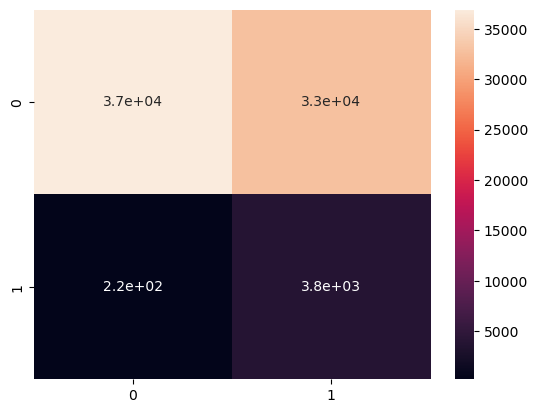

In [109]:
performance(X_test_encoded,y_test,XGB1_null_dropped)

In [110]:
model_name = ['LR_null_dropped_withou_SMOTE','LR_null_dropped_SMOTE','DT_model_without_null']
Train_recall = [0.25,0.59,0.67,0.97]
Test_recall = [0.25,0.59,0.36,0.95]
Train_accuracy = [0.95,0.84,0.86,0.66]
Test_accuracy = [0.95,0.92,0.90,0.55]
Train_AUC = [0.8876,0.8904,0.9148,0.9254]
Test_AUC = [0.8898,0.8871,0.8049,0.8775]

## With null model

In [111]:
df['GeneralHealth'].describe()

count        443934
unique            5
top       Very good
freq         148444
Name: GeneralHealth, dtype: object

In [112]:
pd.crosstab(df['GeneralHealth'],df['LastCheckupTime'])

LastCheckupTime,5 or more years ago,Within past 2 years (1 year but less than 2 years ago),Within past 5 years (2 years but less than 5 years ago),Within past year (anytime less than 12 months ago)
GeneralHealth,,,,
Excellent,4554,8288,5161,52302
Fair,2110,4275,2649,50080
Good,5814,12975,7563,114505
Poor,654,1054,661,16817
Very good,5869,15252,8792,116430


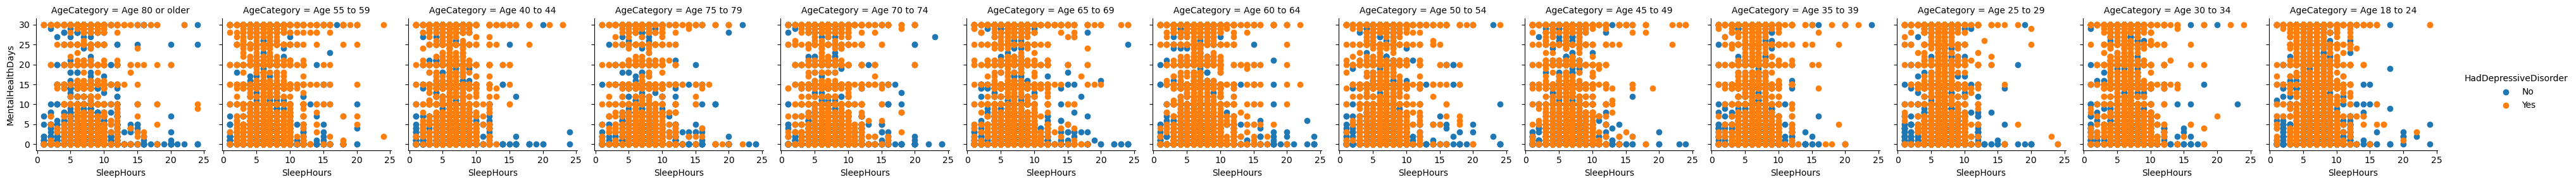

In [113]:
sleepplot = sns.FacetGrid(df,col='AgeCategory',hue='HadDepressiveDisorder')
sleepplot.map(plt.scatter,'SleepHours','MentalHealthDays').add_legend()
plt.show()

- No distinct pattern identified with sleephours mental health days and depression. Proportion of positive Cases is more with less no of sleep hours.

In [114]:
df.groupby('AgeCategory')['ECigaretteUsage'].apply(lambda x: x.mode())

AgeCategory       
Age 18 to 24     0    Never used e-cigarettes in my entire life
Age 25 to 29     0    Never used e-cigarettes in my entire life
Age 30 to 34     0    Never used e-cigarettes in my entire life
Age 35 to 39     0    Never used e-cigarettes in my entire life
Age 40 to 44     0    Never used e-cigarettes in my entire life
Age 45 to 49     0    Never used e-cigarettes in my entire life
Age 50 to 54     0    Never used e-cigarettes in my entire life
Age 55 to 59     0    Never used e-cigarettes in my entire life
Age 60 to 64     0    Never used e-cigarettes in my entire life
Age 65 to 69     0    Never used e-cigarettes in my entire life
Age 70 to 74     0    Never used e-cigarettes in my entire life
Age 75 to 79     0    Never used e-cigarettes in my entire life
Age 80 or older  0    Never used e-cigarettes in my entire life
Name: ECigaretteUsage, dtype: object

- Among all age groups never smoked is most common.
- Among all age groups Never used e-cigarettes in my entire life is most common.

In [115]:
df.groupby('Sex')['ECigaretteUsage'].apply(lambda x: x.mode())

Sex      
Female  0    Never used e-cigarettes in my entire life
Male    0    Never used e-cigarettes in my entire life
Name: ECigaretteUsage, dtype: object

- Among both gender never smoked is most common.
- Among both gender Never used e-cigarettes in my entire life is most common.

### Missing Value treatment 

- Drop rows where Target is null
- KNN Imputer for missing values in numeric columns. Will recalculate BMI after ht and wt missing value imputations.
- Will try Simple imputer for missing values in categoric and filling of missing values by model building with Random Forest classifier.


In [186]:
df.drop(['SleepHours','HeightInMeters', 'WeightInKilograms','MentalHealthDays'],axis=1,inplace=True)

In [187]:
df['HadHeartAttack'].isnull().sum()

3065

In [188]:
df.dropna(subset=['HadHeartAttack'], inplace=True)

In [189]:
df.reset_index(drop=True, inplace=True)

In [190]:
df['HadHeartAttack'].isnull().sum()            # no missing values in had heart attack now.

0

In [191]:
df.shape

(442067, 36)

In [192]:
from fancyimpute import KNN, IterativeImputer
from sklearn.preprocessing import StandardScaler

In [196]:
df['BMI'].fillna(df['BMI'].median(),inplace=True) # giving same result as KNN so for time saving median imputation

In [197]:
df['BMI'].describe()

count    442067.000000
mean         28.409431
std           6.193497
min          12.020000
25%          24.410000
50%          27.440000
75%          31.010000
max          99.640000
Name: BMI, dtype: float64

- Considering dropping height and weight imputing remaining BMI values.

In [199]:
# Transform 'PhysicalHealthDays' column using log transformation
df['PhysicalHealthDays'] = np.log1p(df['PhysicalHealthDays'])

# Compute Box-Cox transformation of 'BMI' column and assign to the column
transform_bmi, _ = boxcox(df['BMI'])
df['BMI'] = transform_bmi

In [200]:
df.describe()

,PhysicalHealthDays,BMI
count,431470.000000,442067.000000
mean,0.797437,1.413160
std,1.170355,0.025797
min,0.000000,1.272990
25%,0.000000,1.397237
50%,0.000000,1.413033
75%,1.386294,1.428372
max,3.433987,1.528911


In [201]:
df.isnull().sum()

Sex                              0
GeneralHealth                 1095
PhysicalHealthDays           10597
LastCheckupTime               8041
PhysicalActivities             972
RemovedTeeth                 11010
HadHeartAttack                   0
HadAngina                     3588
HadStroke                     1070
HadAsthma                     1437
HadSkinCancer                 2764
HadCOPD                       1838
HadDepressiveDisorder         2421
HadKidneyDisease              1614
HadArthritis                  2313
HadDiabetes                    813
DeafOrHardOfHearing          20278
BlindOrVisionDifficulty      21190
DifficultyConcentrating      23795
DifficultyWalking            23604
DifficultyDressingBathing    23513
DifficultyErrands            25231
SmokerStatus                 34941
ECigaretteUsage              35143
ChestScan                    55288
RaceEthnicityCategory        13698
AgeCategory                   8807
BMI                              0
AlcoholDrinkers     

In [202]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [203]:
df_cat = df[['GeneralHealth','PhysicalHealthDays','LastCheckupTime','RemovedTeeth','HadDiabetes',
   'SmokerStatus','ECigaretteUsage','RaceEthnicityCategory','AgeCategory','TetanusLast10Tdap']]

In [204]:
for i in df_cat.columns:
    df_cat[i]=imp.fit_transform(pd.DataFrame(df_cat[i]))

In [205]:
df_cat.isnull().sum()

GeneralHealth            0
PhysicalHealthDays       0
LastCheckupTime          0
RemovedTeeth             0
HadDiabetes              0
SmokerStatus             0
ECigaretteUsage          0
RaceEthnicityCategory    0
AgeCategory              0
TetanusLast10Tdap        0
dtype: int64

In [206]:
df.drop(df_cat,axis=1,inplace=True)

In [207]:
df = pd.concat([df,df_cat],axis=1)

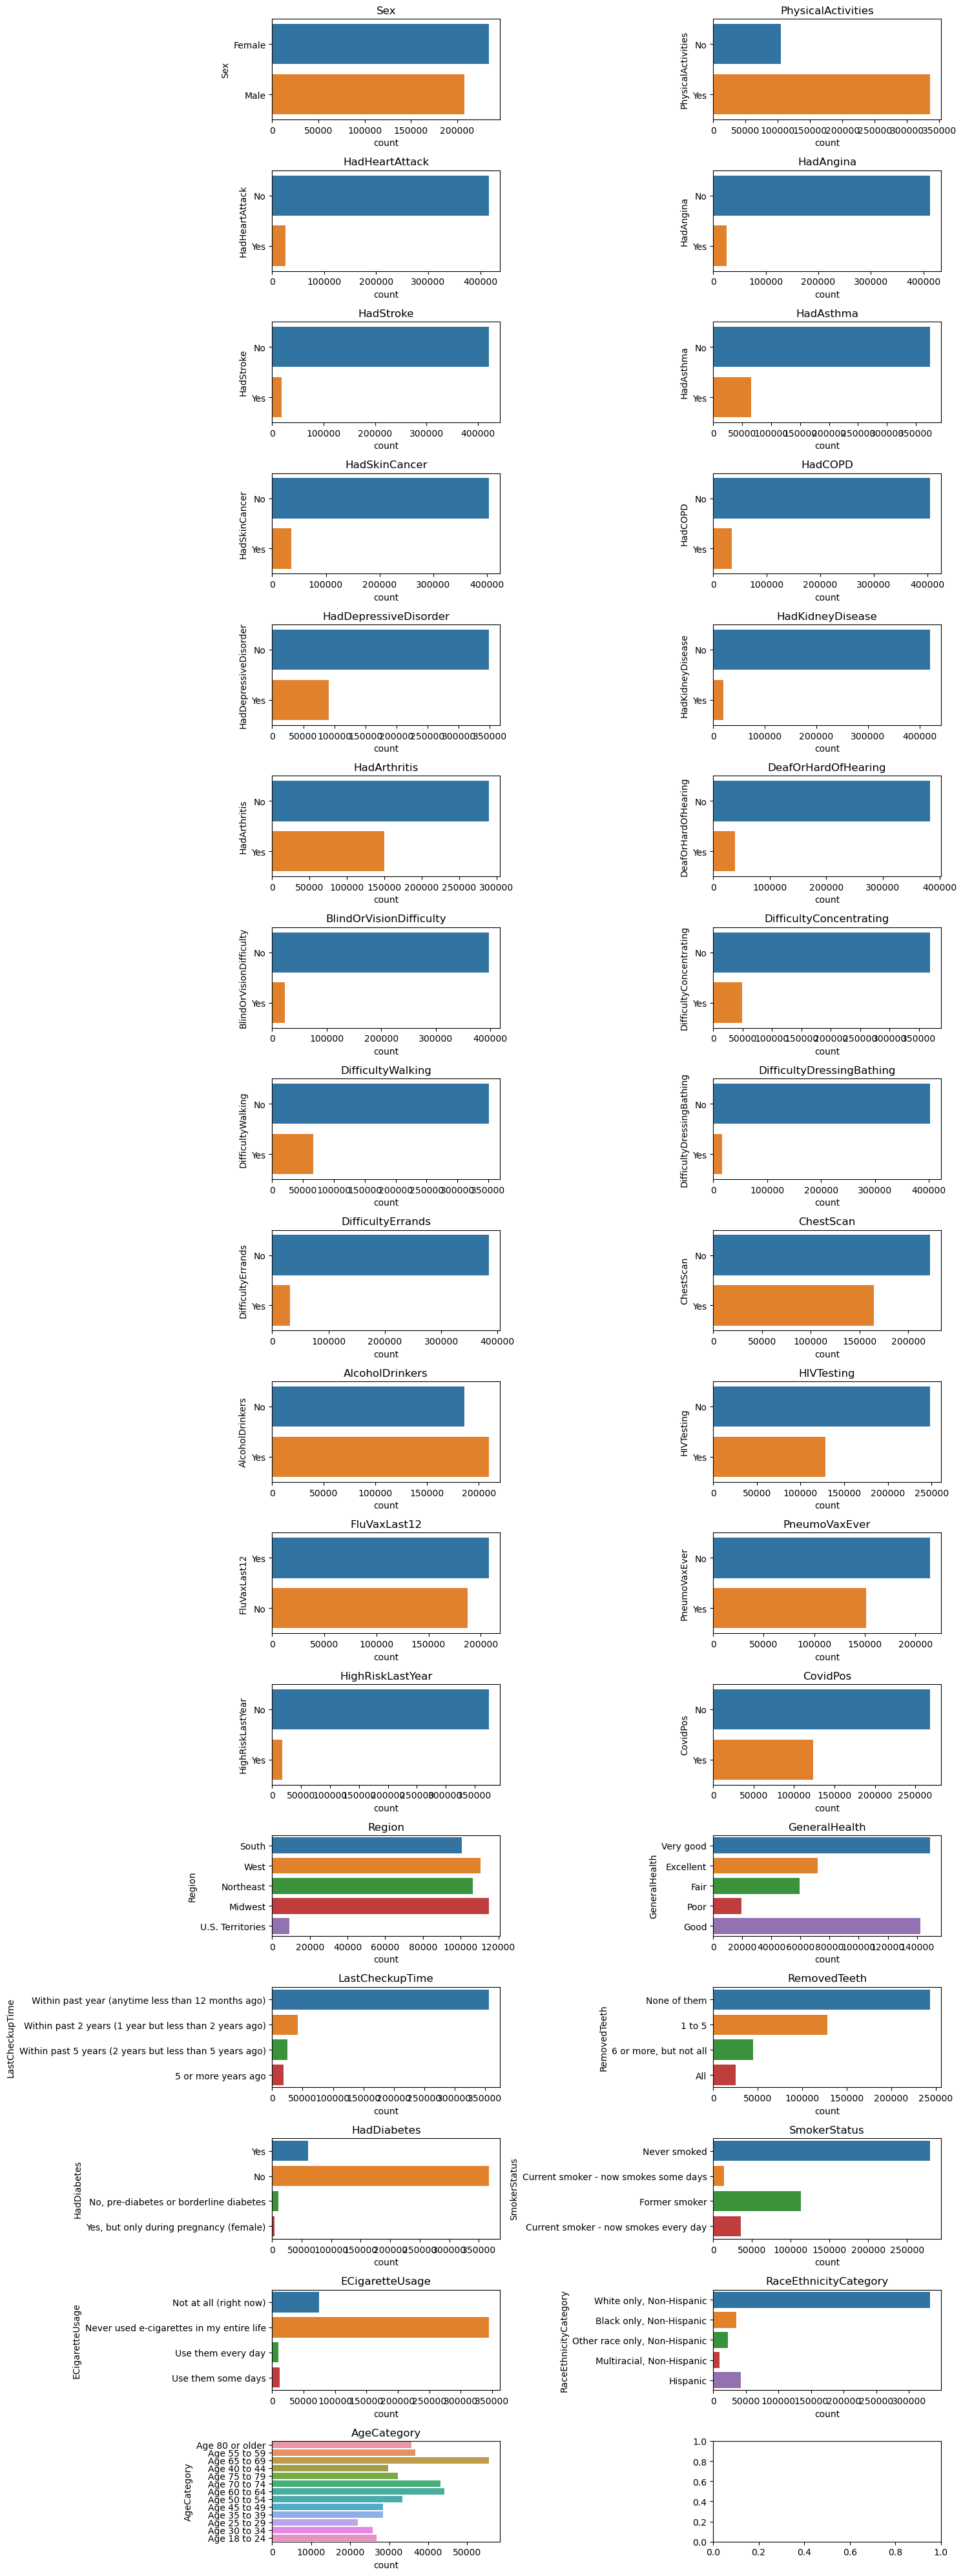

In [148]:
df_col=df.select_dtypes(include=object)

fig, ax = plt.subplots(17, 2, figsize=(15, 40))  
for axis, col in zip(ax.flatten(), df_col.drop(i,axis=1).columns):
    sns.countplot(y=col, data=df, ax=axis)
    axis.set_title(col)

fig.tight_layout()
plt.show()

In [208]:
df2=df.copy()
df2.head(2)

,Sex,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos,Region,GeneralHealth,PhysicalHealthDays,LastCheckupTime,RemovedTeeth,HadDiabetes,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,TetanusLast10Tdap
0,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1.413033,No,No,Yes,No,No,No,South,Very good,0.0,Within past year (anytime less than 12 months ...,None of them,Yes,Never smoked,Not at all (right now),"White only, Non-Hispanic",Age 80 or older,"Yes, received tetanus shot but not sure what type"
1,Female,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1.408797,No,No,No,No,No,No,South,Excellent,0.0,Within past year (anytime less than 12 months ...,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,"No, did not receive any tetanus shot in the pa..."


In [209]:
def fill_na_with_rf(df, target_column, random_state=24, n_estimators=50):
    # Separate rows with non-null and null target values
    df_train = df.dropna()
    df_predict = df[df[target_column].isnull()]
    # Handle categorical features
    categorical_columns = df_train.select_dtypes(include='object').columns
    encoder = ce.OrdinalEncoder(cols=categorical_columns)
    df_train_encoded = encoder.fit_transform(df_train)
    # Split features and target for training
    X_train = df_train_encoded.drop(target_column, axis=1)
    y_train = df_train_encoded[target_column]
    # Split features for prediction
    X_predict = df_predict.drop(target_column, axis=1)
    # Drop missing values in the prediction set
    X_predict.dropna(inplace=True)
    # Handle categorical features
    categorical_columns = X_predict.select_dtypes(include='object').columns
    encoder = ce.OrdinalEncoder(cols=categorical_columns)
    X_predict_encoded = encoder.fit_transform(X_predict)
    # Train a Random Forest classifier
    rf_fill_na = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    rf_fill_na.fit(X_train, y_train)
    # Predict the target values for the missing entries
    y_pred = rf_fill_na.predict(X_predict_encoded)
    # Update the original DataFrame with the predicted values
    df.loc[X_predict_encoded.index, target_column] = y_pred
    df[target_column].replace({1: 'No',2: 'Yes'},inplace=True)

    return df[target_column].isnull().sum()

In [211]:
l=list(df.isnull().sum()[df.isnull().sum()>0].index)

In [212]:
for i in l:
    if df[i].isnull().any():
        fill_na_with_rf(df, i, random_state=24, n_estimators=50)
print(df.isnull().sum())

Sex                              0
PhysicalActivities             550
HadHeartAttack                   0
HadAngina                     1739
HadStroke                      544
HadAsthma                      787
HadSkinCancer                 1281
HadCOPD                       1087
HadDepressiveDisorder         1390
HadKidneyDisease               871
HadArthritis                  1266
DeafOrHardOfHearing          19578
BlindOrVisionDifficulty      20651
DifficultyConcentrating      22564
DifficultyWalking            22979
DifficultyDressingBathing    23308
DifficultyErrands            24731
ChestScan                    44333
BMI                              0
AlcoholDrinkers              42620
HIVTesting                   52412
FluVaxLast12                 45224
PneumoVaxEver                52389
HighRiskLastYear             49130
CovidPos                     49114
Region                           0
GeneralHealth                    0
PhysicalHealthDays               0
LastCheckupTime     

In [214]:
df_filled = df.apply(lambda x: x.fillna(x.mode().iloc[0]))

# Display the DataFrame with filled values
df_filled.head()

,Sex,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos,Region,GeneralHealth,PhysicalHealthDays,LastCheckupTime,RemovedTeeth,HadDiabetes,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,TetanusLast10Tdap
0,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1.413033,No,No,Yes,No,No,No,South,Very good,0.000000,Within past year (anytime less than 12 months ...,None of them,Yes,Never smoked,Not at all (right now),"White only, Non-Hispanic",Age 80 or older,"Yes, received tetanus shot but not sure what type"
1,Female,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1.408797,No,No,No,No,No,No,South,Excellent,0.000000,Within past year (anytime less than 12 months ...,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,"No, did not receive any tetanus shot in the pa..."
2,Female,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1.403854,No,No,No,No,No,Yes,South,Very good,1.098612,Within past year (anytime less than 12 months ...,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 55 to 59,"No, did not receive any tetanus shot in the pa..."
3,Female,Yes,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,Yes,1.390632,No,No,Yes,Yes,No,No,South,Excellent,0.000000,Within past year (anytime less than 12 months ...,None of them,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,"No, did not receive any tetanus shot in the pa..."
4,Female,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1.380645,Yes,No,No,Yes,No,No,South,Fair,1.098612,Within past year (anytime less than 12 months ...,None of them,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 40 to 44,"No, did not receive any tetanus shot in the pa..."


In [215]:
df_filled.isnull().sum()

Sex                          0
PhysicalActivities           0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
ChestScan                    0
BMI                          0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
HighRiskLastYear             0
CovidPos                     0
Region                       0
GeneralHealth                0
PhysicalHealthDays           0
LastCheckupTime              0
RemovedTeeth                 0
HadDiabetes                  0
SmokerStatus                 0
ECigaret

In [216]:
df_filled['HadHeartAttack'].replace({'Yes':1,'No':0},inplace=True)

In [217]:
X = df_filled.drop('HadHeartAttack', axis=1)
y = df_filled['HadHeartAttack']
categorical_columns = X.select_dtypes(include=object).columns

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

encoder = ce.WOEEncoder(cols=categorical_columns)

X_train_encoded_full = encoder.fit_transform(X_train1, y_train1)
X_test_encoded_full = encoder.transform(X_test1)

In [218]:
print(X_train_encoded_full.shape,y_train1.shape,X_test_encoded_full.shape,y_test1.shape)

(309446, 35) (309446,) (132621, 35) (132621,)


In [219]:
lr_model = LogisticRegression(random_state=100)
lr_model.fit(X_train_encoded_full,y_train1)

LogisticRegression(random_state=100)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    291870
           1       0.57      0.24      0.34     17576

    accuracy                           0.95    309446
   macro avg       0.76      0.61      0.65    309446
weighted avg       0.93      0.95      0.94    309446

AUC Score: 0.8838470141736212


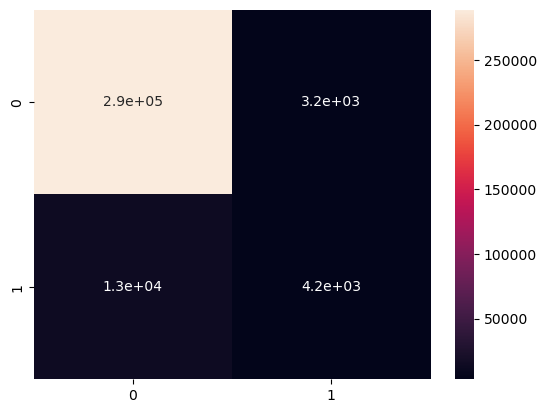

In [220]:
performance(X_train_encoded_full,y_train1,lr_model)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    125089
           1       0.55      0.23      0.32      7532

    accuracy                           0.95    132621
   macro avg       0.75      0.61      0.65    132621
weighted avg       0.93      0.95      0.93    132621

AUC Score: 0.8809326251477403


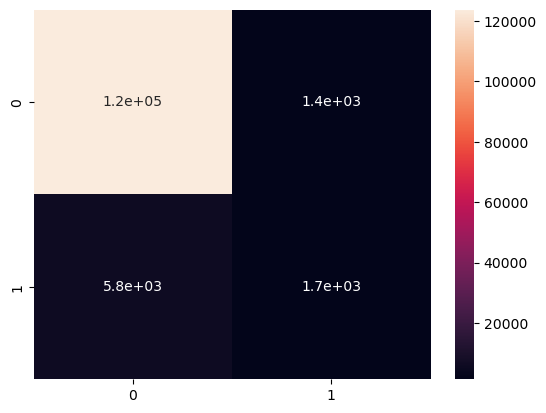

In [221]:
performance(X_test_encoded_full,y_test1,lr_model)

In [224]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=100,sampling_strategy=0.4,k_neighbors=10)
X_train_2,y_train_2 = smt.fit_resample(X_train_encoded_full,y_train1)
print(X_train_2.shape,y_train_2.shape)

(408618, 35) (408618,)


In [225]:
print('Before SMOTE')
print(y_train1.value_counts(normalize=True))
print('After SMOTE')
print(y_train_2.value_counts(normalize=True))

Before SMOTE
0    0.943202
1    0.056798
Name: HadHeartAttack, dtype: float64
After SMOTE
0    0.714286
1    0.285714
Name: HadHeartAttack, dtype: float64


In [132]:
lr_model2 = LogisticRegression(random_state=100)
lr_model2.fit(X_train_2,y_train_2)

LogisticRegression(random_state=100)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89    291870
           1       0.78      0.59      0.67    116748

    accuracy                           0.83    408618
   macro avg       0.82      0.76      0.78    408618
weighted avg       0.83      0.83      0.83    408618

AUC Score: 0.8865832928209246


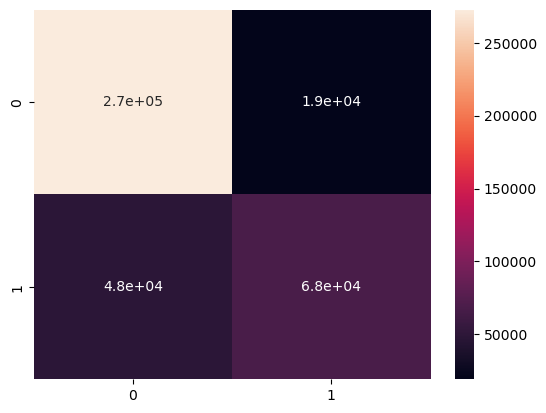

In [133]:
performance(X_train_2,y_train_2,lr_model2)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95    125089
           1       0.34      0.58      0.43      7532

    accuracy                           0.91    132621
   macro avg       0.66      0.75      0.69    132621
weighted avg       0.94      0.91      0.92    132621

AUC Score: 0.8787446949030921


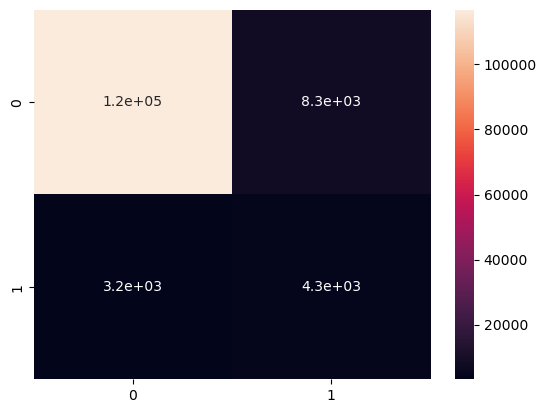

In [134]:
performance(X_test_encoded_full,y_test1,lr_model2)

In [226]:
### Decision Tree

param_dist = {
    'max_depth': randint(3, 10),  # Depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
}

# Initialize RandomizedSearchCV
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   scoring='recall',
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)


dt_model = dt_random_search.fit(X_train_2,y_train_2)
dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 14}

In [227]:
dt_model2 = DecisionTreeClassifier(**dt_model.best_params_,random_state=10)
dt_model2.fit(X_train_2,y_train_2)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=14,
                       random_state=10)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94    291870
           1       0.92      0.79      0.85    116748

    accuracy                           0.92    408618
   macro avg       0.92      0.88      0.90    408618
weighted avg       0.92      0.92      0.92    408618

AUC Score: 0.9476973050415686


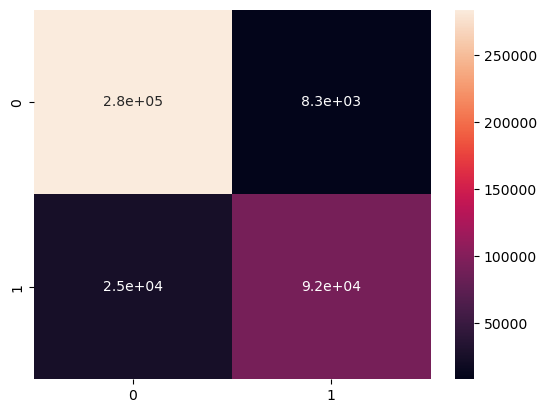

In [228]:
performance(X_train_2,y_train_2,dt_model2)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    125089
           1       0.45      0.41      0.43      7532

    accuracy                           0.94    132621
   macro avg       0.71      0.69      0.70    132621
weighted avg       0.94      0.94      0.94    132621

AUC Score: 0.8572080353774836


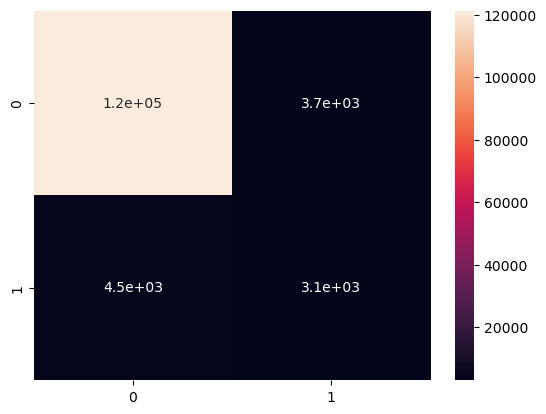

In [229]:
performance(X_test_encoded_full,y_test1,dt_model2)

In [357]:
model_name = ['Logit_null_dropped_without_SMOTE','LR_null_dropped_SMOTE','DT_model_without_null','XGB_1',
              'Logit_afternull_smt','DT_full']
Train_recall = [0.25,0.59,0.67,0.97,0.59,0.79]
Test_recall = [0.25,0.59,0.36,0.95,0.58,0.41]
Train_accuracy = [0.95,0.84,0.86,0.66,0.83,0.92]
Test_accuracy = [0.95,0.92,0.90,0.55,0.91,0.94]
Train_AUC = [0.8876,0.8904,0.9148,0.9254,0.8865,0.9476]
Test_AUC = [0.8898,0.8871,0.8049,0.8775,0.8787,0.8572]

In [356]:
rf_model2=RandomForestClassifier(n_estimators= 50, min_samples_split= 7, min_samples_leaf= 2,
                                 max_features= 'sqrt', max_depth= 15,random_state=10)
rf_model2.fit(X_train_2,y_train_2)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=50, random_state=10)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    291870
           1       0.96      0.89      0.93    116748

    accuracy                           0.96    408618
   macro avg       0.96      0.94      0.95    408618
weighted avg       0.96      0.96      0.96    408618

AUC Score: 0.9879740072289371


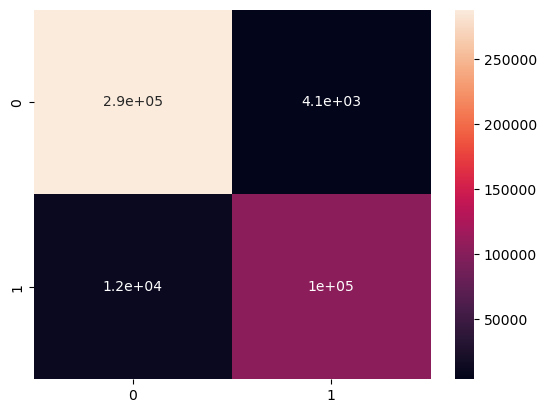

In [358]:
performance(X_train_2,y_train_2,rf_model2)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    125089
           1       0.49      0.34      0.40      7532

    accuracy                           0.94    132621
   macro avg       0.73      0.66      0.69    132621
weighted avg       0.93      0.94      0.94    132621

AUC Score: 0.879246486857173


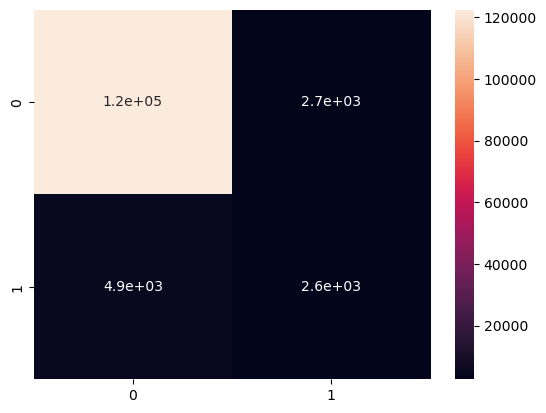

In [359]:
performance(X_test_encoded_full,y_test1,rf_model2)

In [360]:
model_name = ['Logit_null_dropped_without_SMOTE','LR_null_dropped_SMOTE','DT_model_without_null','XGB_1',
              'Logit_afternull_smt','DT_full','RF_full']
Train_recall = [0.25,0.59,0.67,0.97,0.59,0.79,0.89]
Test_recall = [0.25,0.59,0.36,0.95,0.58,0.41,0.34]
Train_accuracy = [0.95,0.84,0.86,0.66,0.83,0.92,0.96]
Test_accuracy = [0.95,0.92,0.90,0.55,0.91,0.94,0.94]
Train_AUC = [0.8876,0.8904,0.9148,0.9254,0.8865,0.9476,0.9879]
Test_AUC = [0.8898,0.8871,0.8049,0.8775,0.8787,0.8572,0.8792]

In [234]:
param_grid = {'max_depth': [3, 5, 7],
    'min_child_weight': [3, 5, 6],
    'gamma': [0.01, 0.1, 0.11],
    'scale_pos_weight': [4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0], 
    'colsample_bytree': [0.6, 0.8, 1.0]}


xgb = XGBClassifier()

XG_Model= RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,scoring='recall', cv=3, n_jobs=-1)
xg_tunned = XG_Model.fit(X_train_2,y_train_2)
xg_tunned.best_params_

{'subsample': 0.6,
 'scale_pos_weight': 5,
 'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.01,
 'colsample_bytree': 0.8}

{'subsample': 0.6,
 'scale_pos_weight': 5,
 'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.01,
 'colsample_bytree': 0.8}  XG params

In [235]:
xgb1 = XGBClassifier(**xg_tunned.best_params_)
xgb1.fit(X_train_2,y_train_2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91    291870
           1       0.73      0.94      0.82    116748

    accuracy                           0.88    408618
   macro avg       0.85      0.90      0.87    408618
weighted avg       0.90      0.88      0.89    408618

AUC Score: 0.9705171383515202


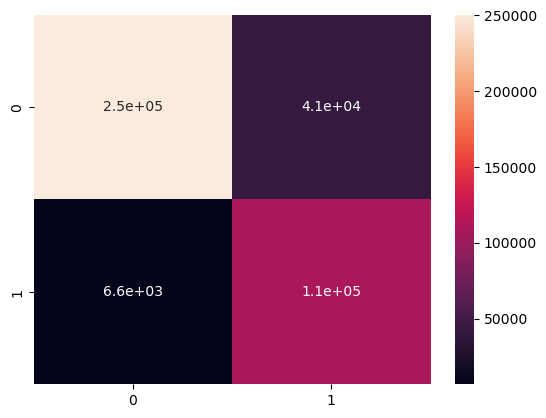

In [320]:
performance(X_train_2,y_train_2,xgb1)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92    125089
           1       0.23      0.71      0.35      7532

    accuracy                           0.85    132621
   macro avg       0.61      0.79      0.63    132621
weighted avg       0.94      0.85      0.88    132621

AUC Score: 0.8757355777025579


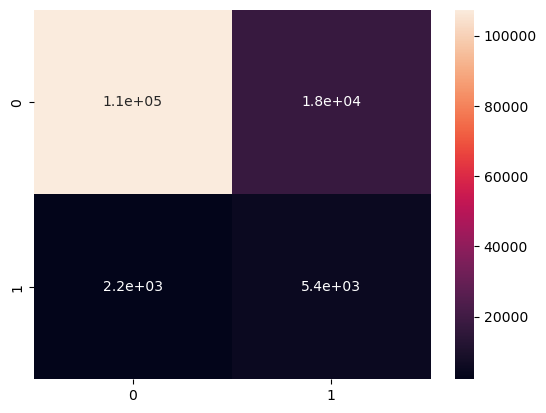

In [237]:
performance(X_test_encoded_full,y_test1,xgb1)

In [361]:
model_name = ['Logit_null_dropped_without_SMOTE','LR_null_dropped_SMOTE','DT_model_without_null','XGB_1',
              'Logit_afternull_smt','DT_full','RF_full','XGB_full']
Train_recall = [0.25,0.59,0.67,0.97,0.59,0.79,0.89,0.94]
Test_recall = [0.25,0.59,0.36,0.95,0.58,0.41,0.34,0.71]
Train_accuracy = [0.95,0.84,0.86,0.66,0.83,0.92,0.96,0.88]
Test_accuracy = [0.95,0.92,0.90,0.55,0.91,0.94,0.94,0.85]
Train_AUC = [0.8876,0.8904,0.9148,0.9254,0.8865,0.9476,0.9879,0.9705]
Test_AUC = [0.8898,0.8871,0.8049,0.8775,0.8787,0.8572,0.8792,0.8757]

In [312]:
from sklearn.metrics import matthews_corrcoef

y_pred=xgb1.predict(X_test_encoded_full)
mcc = matthews_corrcoef(y_test1, y_pred)
print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 0.34790096923509495


In [263]:
features = pd.DataFrame({'Features':X_train_2.columns, 'importance':xgb1.feature_importances_})
features = features.sort_values(by='importance',ascending=False)
features

,Features,importance
2,HadAngina,0.132450
33,AgeCategory,0.085560
28,RemovedTeeth,0.081907
20,FluVaxLast12,0.076304
19,HIVTesting,0.065469
25,GeneralHealth,0.065428
18,AlcoholDrinkers,0.061750
24,Region,0.053627
34,TetanusLast10Tdap,0.044525
0,Sex,0.042859


In [264]:
imp_features = list(features[features['importance']>0.001]['Features'])

In [338]:
X_train_Imp = X_train_2[imp_features]
X_test_Imp = X_test_encoded_full[imp_features]

In [266]:
len(imp_features)

24

In [268]:
xg_imp_features = XGBClassifier(subsample= 0.6,scale_pos_weight=5,min_child_weight= 3,max_depth= 3,
 learning_rate=0.05,gamm=0.01,colsample_bytree= 0.8)
xg_imp_features.fit(X_train_Imp,y_train_2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamm=0.01, gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91    291870
           1       0.73      0.94      0.82    116748

    accuracy                           0.88    408618
   macro avg       0.85      0.90      0.87    408618
weighted avg       0.90      0.88      0.89    408618

AUC Score: 0.9705909552664275


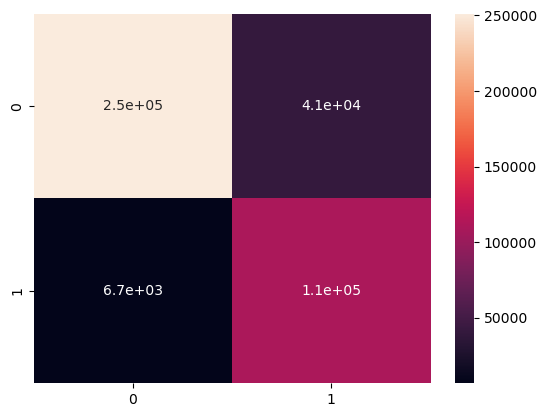

In [269]:
performance(X_train_Imp,y_train_2,xg_imp_features)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92    125089
           1       0.23      0.71      0.35      7532

    accuracy                           0.85    132621
   macro avg       0.61      0.79      0.63    132621
weighted avg       0.94      0.85      0.88    132621

AUC Score: 0.8763994756922663


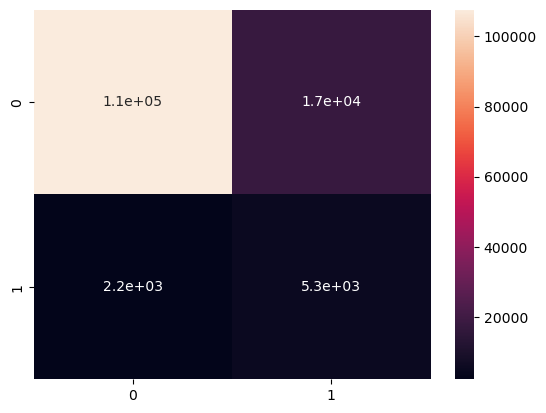

In [270]:
performance(X_test_Imp,y_test1,xg_imp_features)

In [175]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

xg = XGBClassifier(subsample= 0.8,scale_pos_weight = 5, min_child_weight = 6,max_depth= 5,
 learning_rate= 0.01, gamma= 0.1, colsample_bytree= 0.8)

xg_sfs = sfs(estimator=xg, k_features='best', forward = True)
feat = xg_sfs.fit(X_train_Imp,y_train_2)
feat.k_feature_names_

('HadAngina',
 'RemovedTeeth',
 'AgeCategory',
 'GeneralHealth',
 'HadArthritis',
 'DifficultyWalking',
 'Sex',
 'HIVTesting',
 'AlcoholDrinkers',
 'FluVaxLast12',
 'CovidPos',
 'HadDiabetes',
 'SmokerStatus',
 'HadStroke',
 'DifficultyErrands',
 'PneumoVaxEver',
 'PhysicalActivities',
 'HadCOPD',
 'Region',
 'DeafOrHardOfHearing',
 'HadAsthma',
 'HadSkinCancer')

In [303]:
# Important features by sfs

Imp_by_sfs= ['HadAngina','RemovedTeeth','AgeCategory','GeneralHealth','HadArthritis','DifficultyWalking','Sex','HIVTesting',
 'AlcoholDrinkers','FluVaxLast12','CovidPos','HadDiabetes','SmokerStatus','HadStroke','PneumoVaxEver',
 'PhysicalActivities','HadCOPD','Region','DeafOrHardOfHearing','HadAsthma','HadSkinCancer']

In [341]:
X_train_sfs = X_train_2[Imp_by_sfs]
X_test_sfs = X_test_encoded_full[Imp_by_sfs]

In [279]:
param_dist = {'max_depth': randint(3, 10),  
    'min_samples_split': randint(2, 20),  
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2'],  
    'criterion': ['gini', 'entropy']}

# Initialize RandomizedSearchCV
dt_sfs_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   scoring='recall',
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)


dt_model_sfs = dt_sfs_search.fit(X_train_Imp,y_train_2)
dt_model_sfs.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 8,
 'min_samples_split': 10}

In [305]:
dt_sfs = DecisionTreeClassifier(criterion='gini',max_depth= 9,max_features='log2',min_samples_leaf= 8,
 min_samples_split= 10, random_state=10)
dt_sfs.fit(X_train_Imp,y_train_2)

DecisionTreeClassifier(max_depth=9, max_features='log2', min_samples_leaf=8,
                       min_samples_split=10, random_state=10)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92    291870
           1       0.89      0.68      0.77    116748

    accuracy                           0.88    408618
   macro avg       0.88      0.82      0.85    408618
weighted avg       0.88      0.88      0.88    408618

AUC Score: 0.9262626402063692


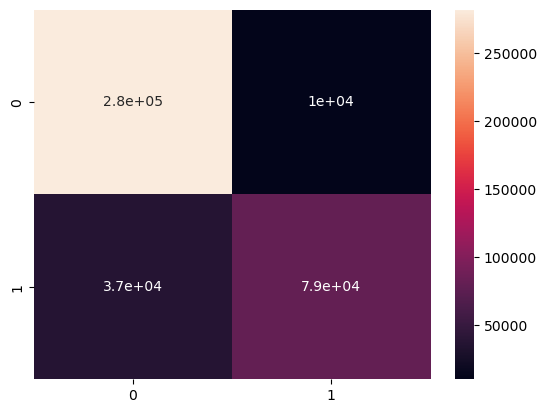

In [306]:
performance(X_train_Imp,y_train_2,dt_sfs)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    125089
           1       0.38      0.37      0.37      7532

    accuracy                           0.93    132621
   macro avg       0.67      0.67      0.67    132621
weighted avg       0.93      0.93      0.93    132621

AUC Score: 0.8253102351932647


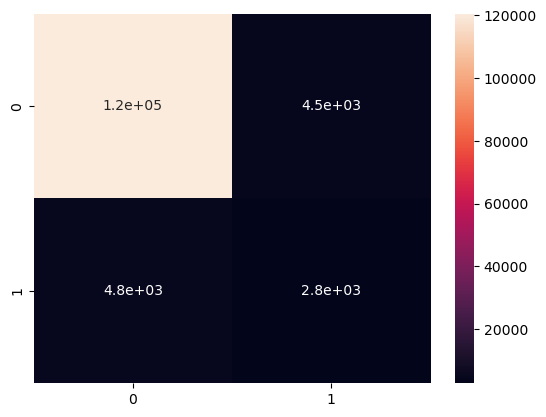

In [307]:
performance(X_test_Imp,y_test1,dt_sfs)

In [365]:
rf_sfs = RandomForestClassifier(n_estimators= 100,min_samples_split= 5,min_samples_leaf=2,
 max_features='sqrt',max_depth= 10,criterion='gini')
rf_sfs.fit(X_train_Imp,y_train_2)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    291870
           1       0.93      0.83      0.88    116748

    accuracy                           0.93    408618
   macro avg       0.93      0.90      0.91    408618
weighted avg       0.93      0.93      0.93    408618

AUC Score: 0.97491800465377


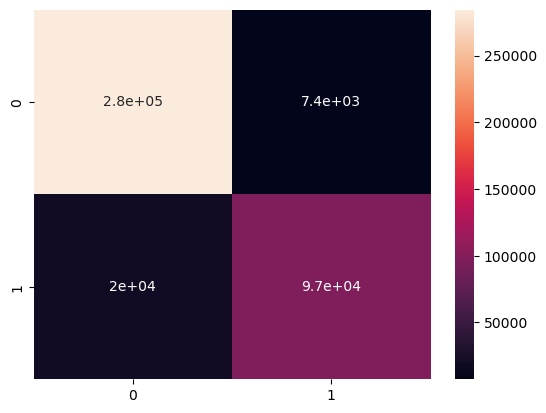

In [366]:
performance(X_train_Imp,y_train_2,rf_sfs)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    125089
           1       0.47      0.40      0.44      7532

    accuracy                           0.94    132621
   macro avg       0.72      0.69      0.70    132621
weighted avg       0.94      0.94      0.94    132621

AUC Score: 0.8780819957411777


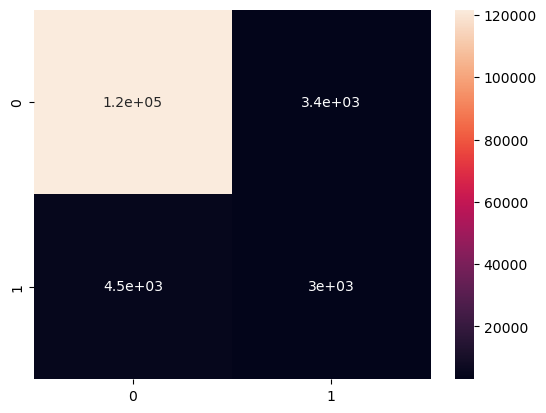

In [367]:
performance(X_test_Imp,y_test1,rf_sfs)

In [ ]:
ada = AdaBoostClassifier()

In [321]:
xg_sfs_features = XGBClassifier(subsample= 0.6,scale_pos_weight=5,min_child_weight= 3,max_depth= 3,
learning_rate=0.05,gamm=0.01,colsample_bytree= 0.8)
xg_sfs_features.fit(X_train_sfs,y_train_2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamm=0.01, gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91    291870
           1       0.73      0.94      0.82    116748

    accuracy                           0.88    408618
   macro avg       0.85      0.90      0.87    408618
weighted avg       0.90      0.88      0.89    408618

AUC Score: 0.9691843628625539


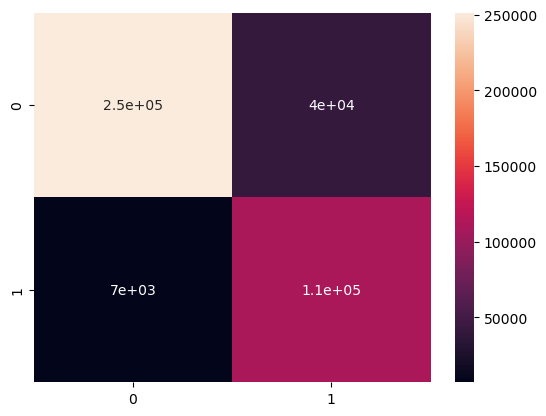

In [322]:
performance(X_train_sfs,y_train_2,xg_sfs_features)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92    125089
           1       0.23      0.71      0.35      7532

    accuracy                           0.85    132621
   macro avg       0.61      0.78      0.63    132621
weighted avg       0.94      0.85      0.88    132621

AUC Score: 0.8720377283620477


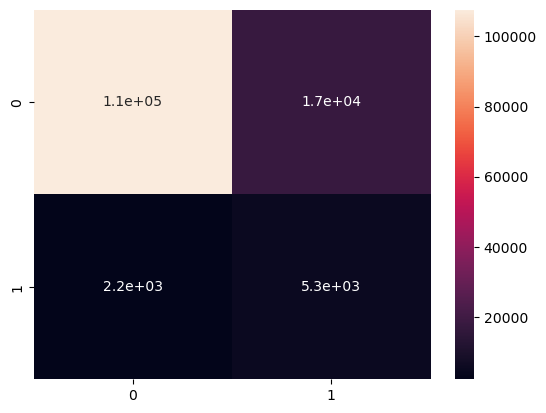

In [323]:
performance(X_test_sfs,y_test1,xg_sfs_features)

In [362]:
model_name = ['Logit_null_dropped_without_SMOTE','LR_null_dropped_SMOTE','DT_model_without_null','XGB_1',
              'Logit_afternull_smt','DT_full','RF_full','XGB_full','XG_Best_params']
Train_recall = [0.25,0.59,0.67,0.97,0.59,0.79,0.89,0.94,0.94]
Test_recall = [0.25,0.59,0.36,0.95,0.58,0.41,0.34,0.71,0.71]
Train_accuracy = [0.95,0.84,0.86,0.66,0.83,0.92,0.96,0.88,0.88]
Test_accuracy = [0.95,0.92,0.90,0.55,0.91,0.94,0.94,0.85,0.85]
Train_AUC = [0.8876,0.8904,0.9148,0.9254,0.8865,0.9476,0.9879,0.9705,0.9691]
Test_AUC = [0.8898,0.8871,0.8049,0.8775,0.8787,0.8572,0.8792,0.8757,0.8720]

In [342]:
features_imp = pd.DataFrame({'Features':X_train_sfs.columns, 'importance':xg_sfs_features.feature_importances_})
features_imp = features_imp.sort_values(by='importance',ascending=False)
features_imp.reset_index(drop=True)

,Features,importance
0,HadAngina,0.179468
1,AgeCategory,0.086306
2,AlcoholDrinkers,0.083339
3,RemovedTeeth,0.077644
4,GeneralHealth,0.075055
5,HIVTesting,0.070412
6,FluVaxLast12,0.065038
7,Region,0.061874
8,CovidPos,0.059257
9,PneumoVaxEver,0.041360


<Axes: xlabel='importance', ylabel='Features'>

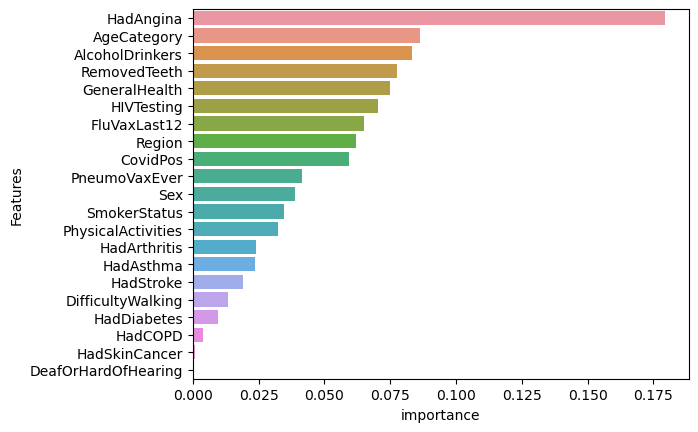

In [325]:
sns.barplot(x='importance',y='Features',data=features_imp)

- Minimal importance to last 2 columns let us drop and retry model.

In [345]:
xtrain= X_train_sfs.drop(['HadSkinCancer','DeafOrHardOfHearing'],axis=1)
xtest= X_test_sfs.drop(['HadSkinCancer','DeafOrHardOfHearing'],axis=1)

In [346]:
xg_sfs_features_2 = XGBClassifier(subsample= 0.6,scale_pos_weight=5,min_child_weight= 3,max_depth= 3,
learning_rate=0.05,gamm=0.01,colsample_bytree= 0.8)
xg_sfs_features_2.fit(xtrain,y_train_2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamm=0.01, gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92    291870
           1       0.74      0.94      0.83    116748

    accuracy                           0.89    408618
   macro avg       0.86      0.90      0.87    408618
weighted avg       0.91      0.89      0.89    408618

AUC Score: 0.9698056610770465


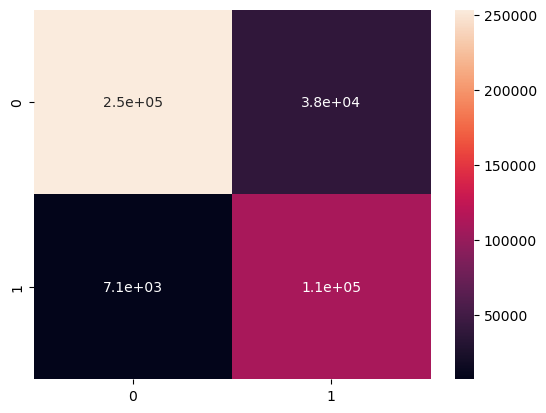

In [348]:
performance(xtrain,y_train_2,xg_sfs_features_2)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92    125089
           1       0.24      0.70      0.36      7532

    accuracy                           0.86    132621
   macro avg       0.61      0.78      0.64    132621
weighted avg       0.94      0.86      0.89    132621

AUC Score: 0.8724008643923062


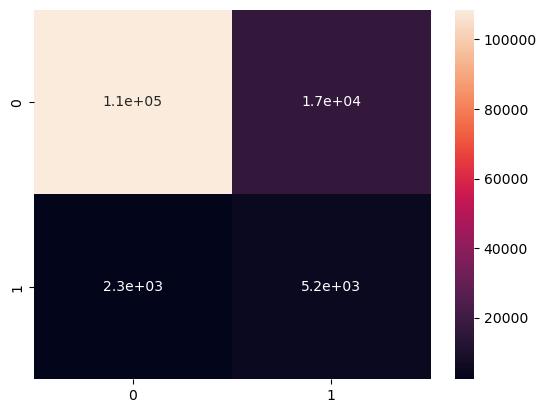

In [349]:
performance(xtest,y_test1,xg_sfs_features_2)

- Dropping columns is reducing accuracy and recall further so we retain the final 21 features for prediction.

In [363]:
model_name = ['Logit_null_dropped_without_SMOTE','LR_null_dropped_SMOTE','DT_model_without_null','XGB_1',
              'Logit_afternull_smt','DT_full','RF_full','XGB_full','XG_Best_params']
Train_recall = [0.25,0.59,0.67,0.97,0.59,0.79,0.89,0.94,0.94]
Test_recall = [0.25,0.59,0.36,0.95,0.58,0.41,0.34,0.71,0.71]
Train_accuracy = [0.95,0.84,0.86,0.66,0.83,0.92,0.96,0.88,0.88]
Test_accuracy = [0.95,0.92,0.90,0.55,0.91,0.94,0.94,0.85,0.85]
Train_AUC = [0.8876,0.8904,0.9148,0.9254,0.8865,0.9476,0.9879,0.9705,0.9691]
Test_AUC = [0.8898,0.8871,0.8049,0.8775,0.8787,0.8572,0.8792,0.8757,0.8720]

model_performance = pd.DataFrame({'model_name':model_name,'Train_recall':Train_recall,'Test_recall':Test_recall,
                               'Train_accuracy':Train_accuracy,'Test_accuracy':Test_accuracy,'Train_AUC':Train_AUC,
                                 'Test_AUC':Test_AUC})
print('Final report of model performance:')
model_performance

Final report of model performance:


,model_name,Train_recall,Test_recall,Train_accuracy,Test_accuracy,Train_AUC,Test_AUC
0,Logit_null_dropped_without_SMOTE,0.25,0.25,0.95,0.95,0.8876,0.8898
1,LR_null_dropped_SMOTE,0.59,0.59,0.84,0.92,0.8904,0.8871
2,DT_model_without_null,0.67,0.36,0.86,0.90,0.9148,0.8049
3,XGB_1,0.97,0.95,0.66,0.55,0.9254,0.8775
4,Logit_afternull_smt,0.59,0.58,0.83,0.91,0.8865,0.8787
5,DT_full,0.79,0.41,0.92,0.94,0.9476,0.8572
6,RF_full,0.89,0.34,0.96,0.94,0.9879,0.8792
7,XGB_full,0.94,0.71,0.88,0.85,0.9705,0.8757
8,XG_Best_params,0.94,0.71,0.88,0.85,0.9691,0.8720


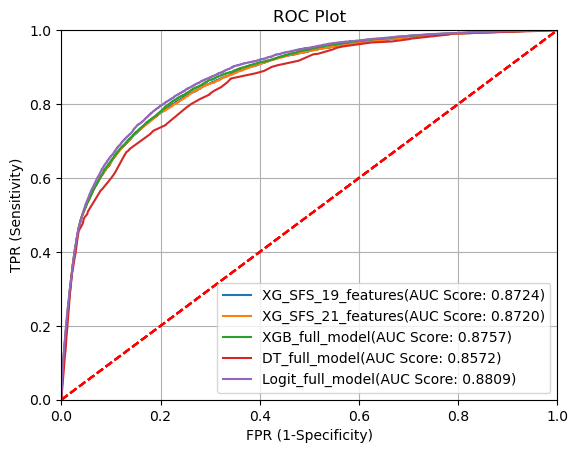

In [364]:
roc_plot(xg_sfs_features_2,xtest,y_test1,'XG_SFS_19_features')
roc_plot(xg_sfs_features,X_test_sfs,y_test1,'XG_SFS_21_features')
roc_plot(xgb1,X_test_encoded_full,y_test1,'XGB_full_model')
roc_plot(dt_model2,X_test_encoded_full,y_test1,'DT_full_model')
roc_plot(lr_model,X_test_encoded_full,y_test1,'Logit_full_model')